In [19]:
%%capture
"""
-----------------------------------------------------------------------------------------------------------------------------------------------------------
This file is used to analyse Hessian information for a model during training for the nested N-spheres task. This was used for the system trained with a
cross entropy loss.
-----------------------------------------------------------------------------------------------------------------------------------------------------------
"""

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [21]:
exp_name = 'experiment_2'
node_type = 'anode(1)'
data_dimension = 4
library_hessian_data = torch.load('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
                                  + exp_name + '/' + node_type + '/hessian_data/library_hessian_data.pt')

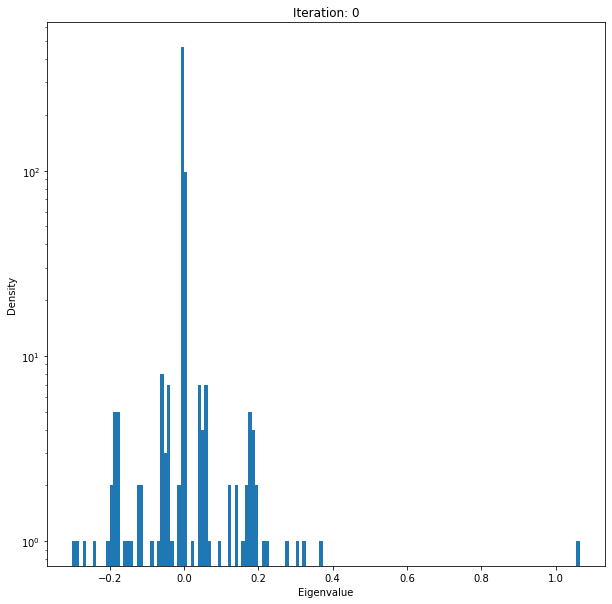

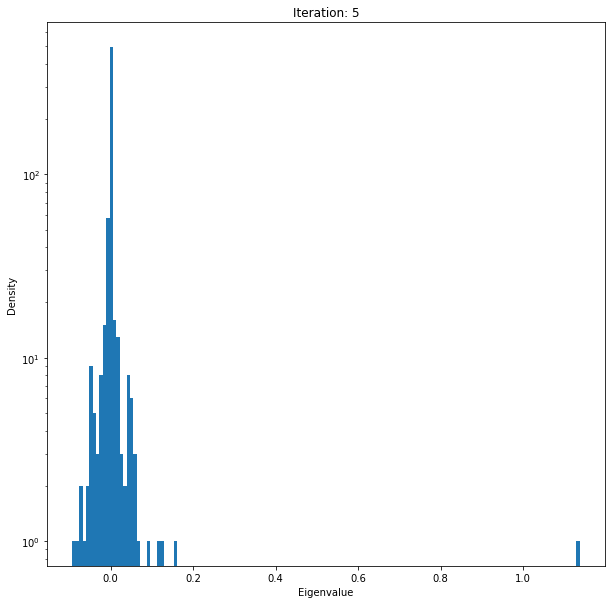

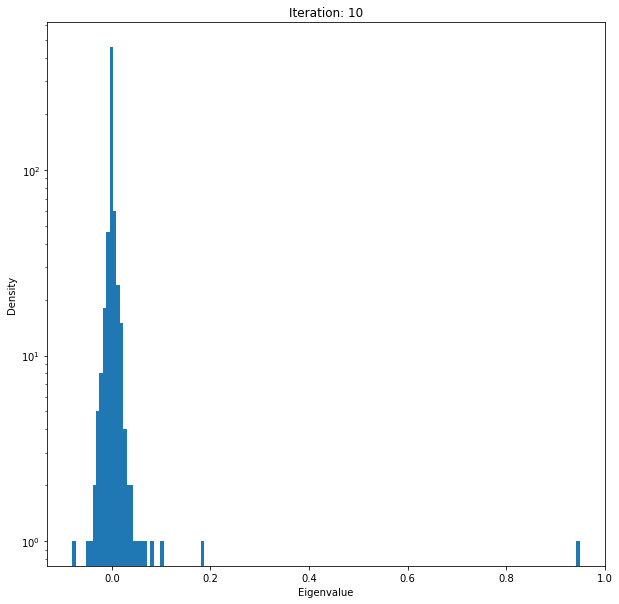

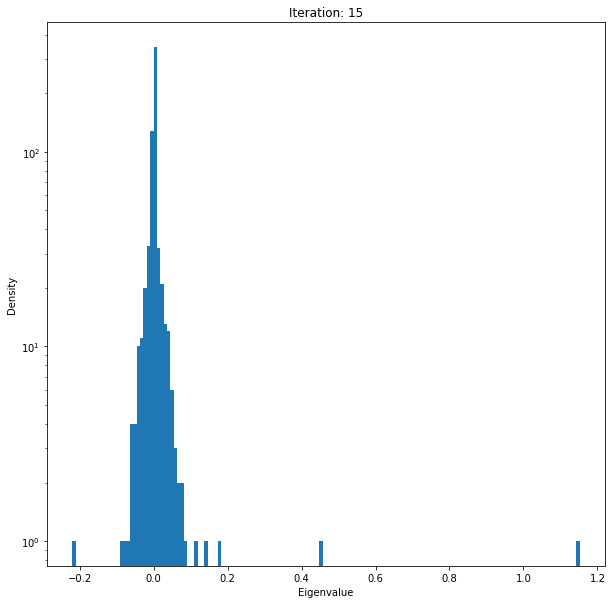

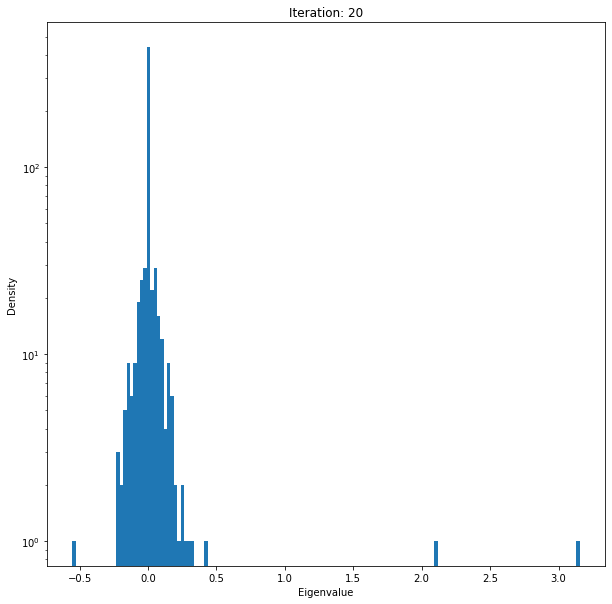

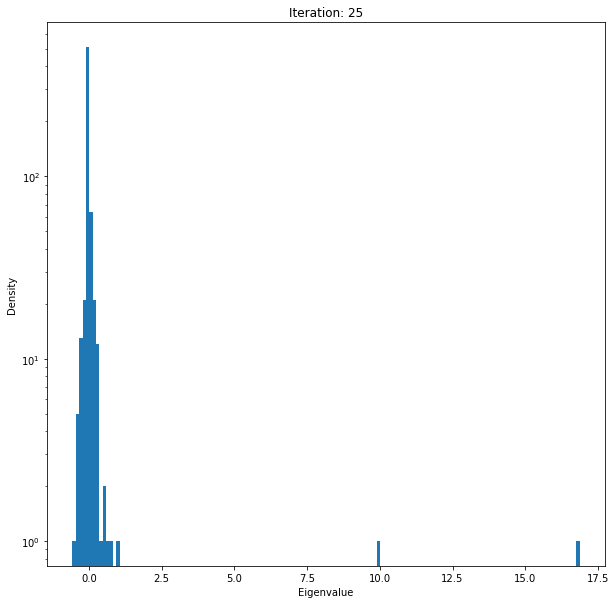

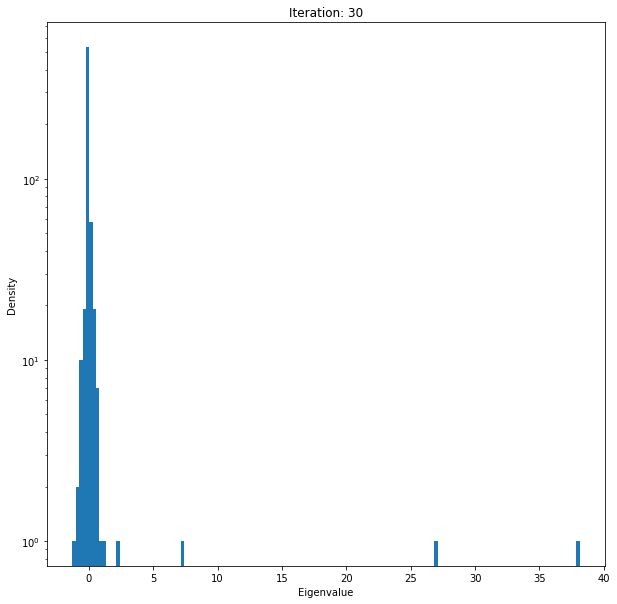

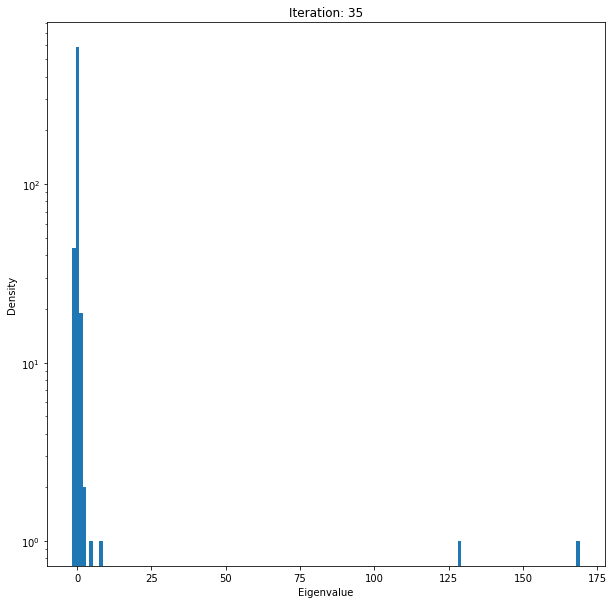

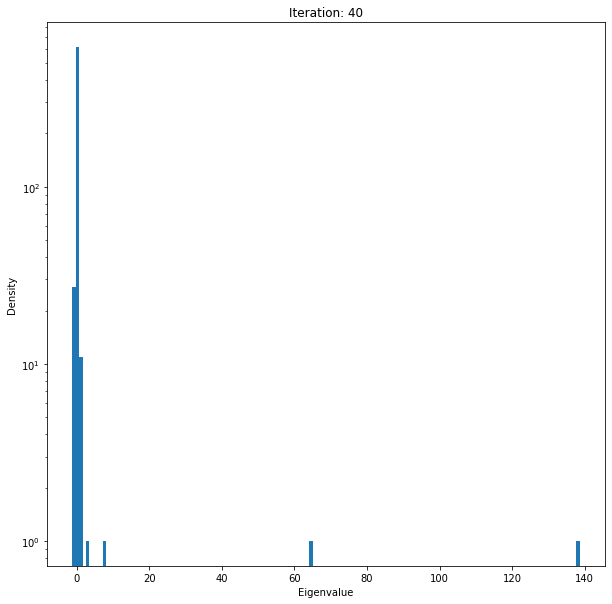

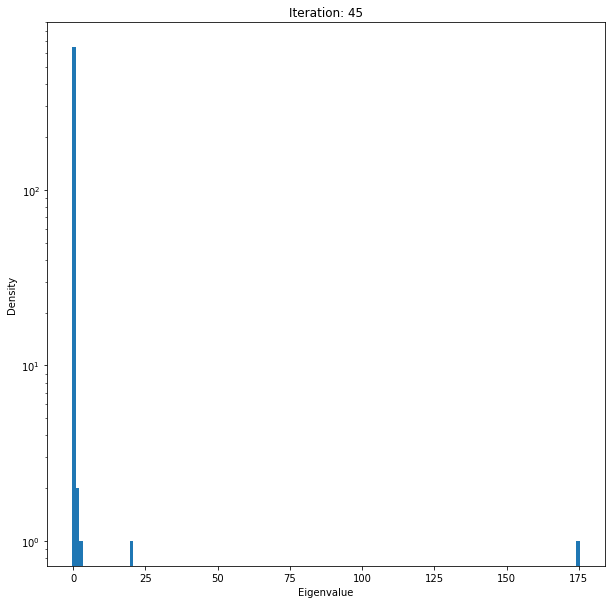

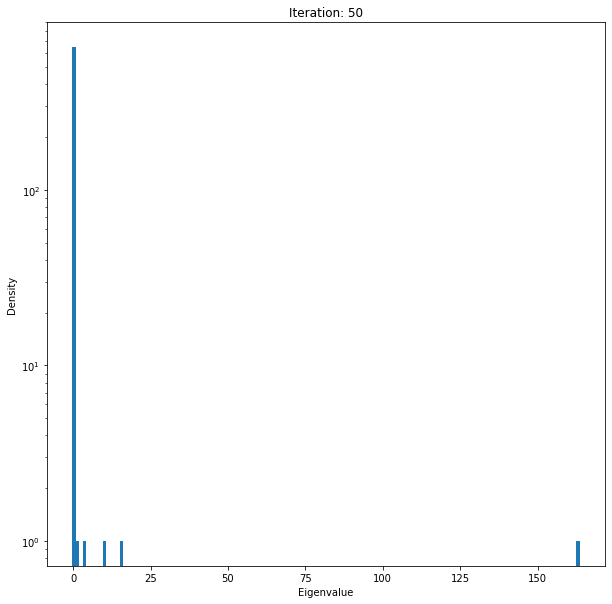

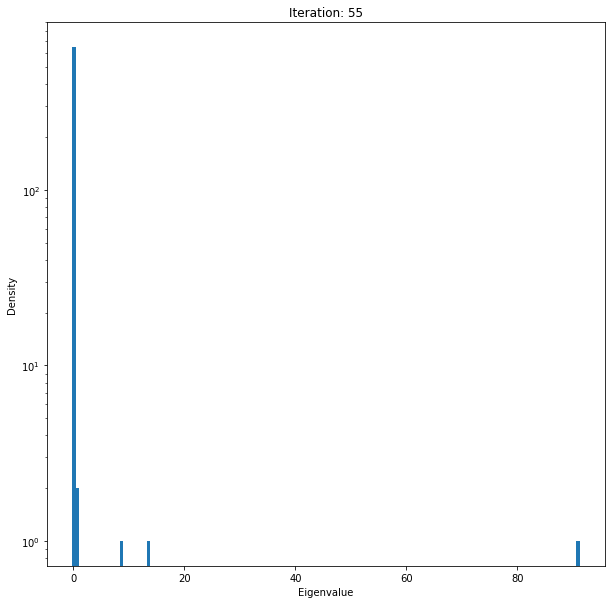

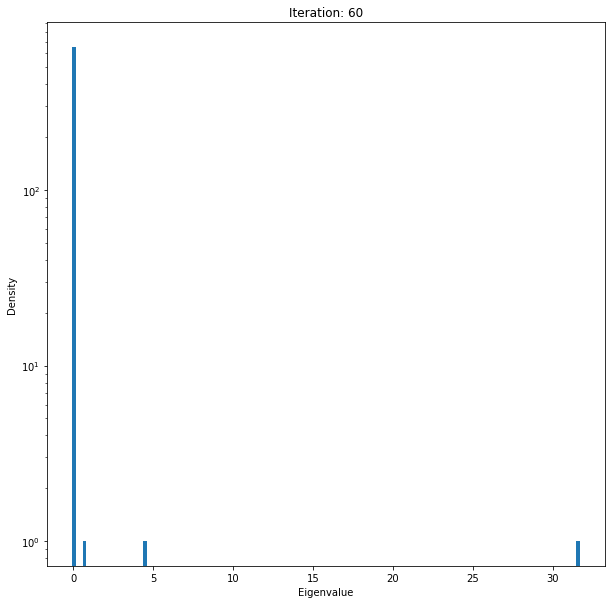

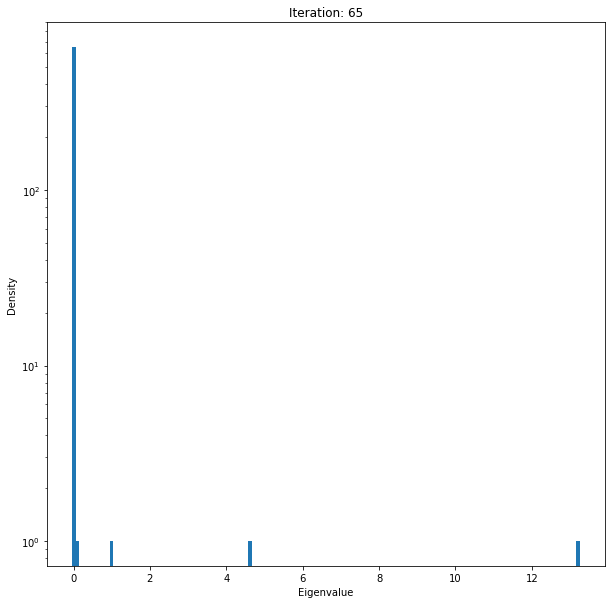

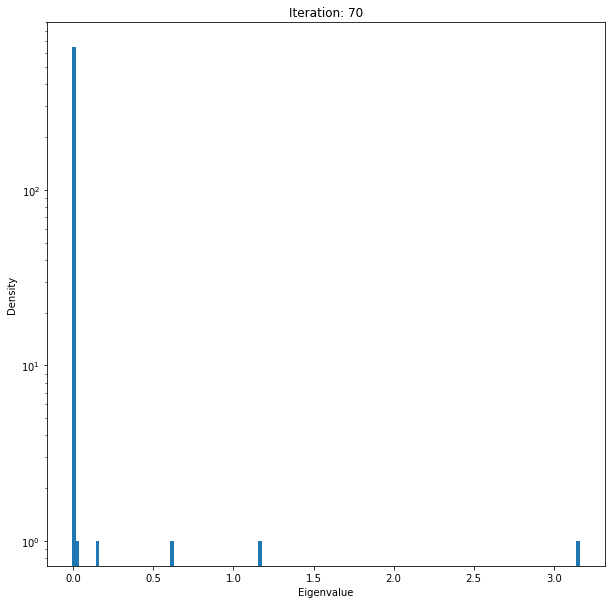

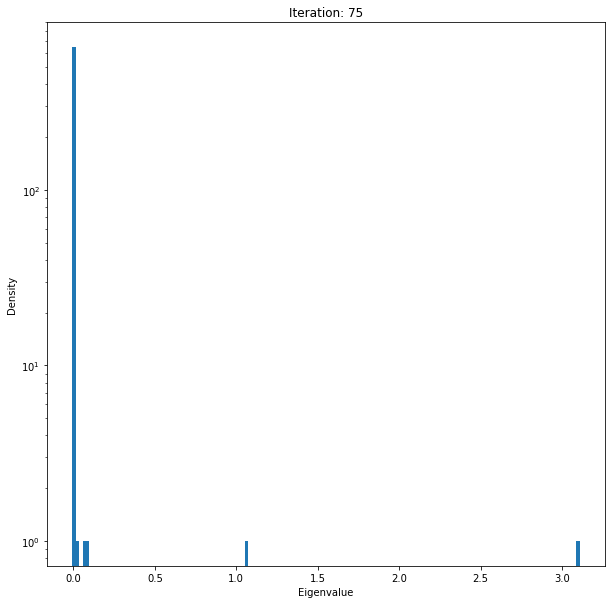

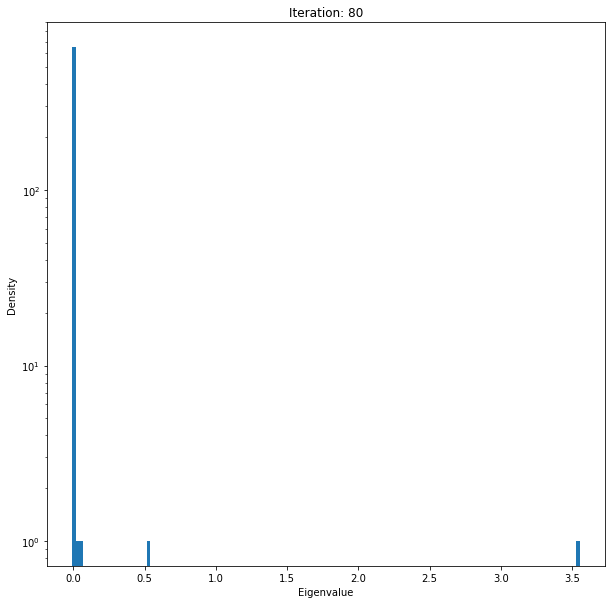

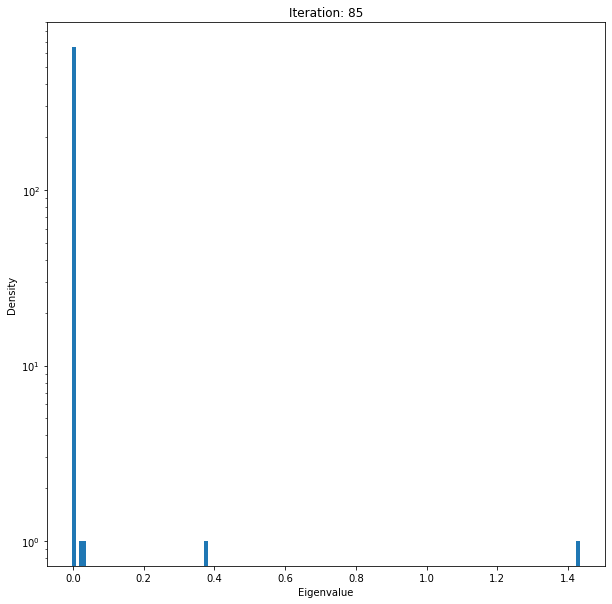

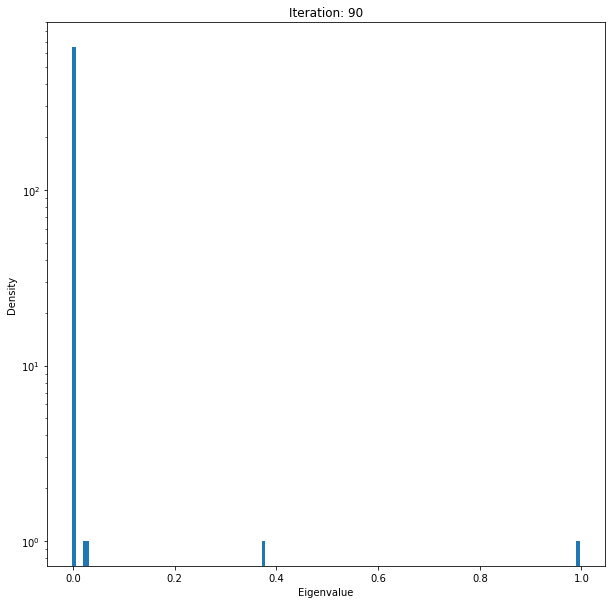

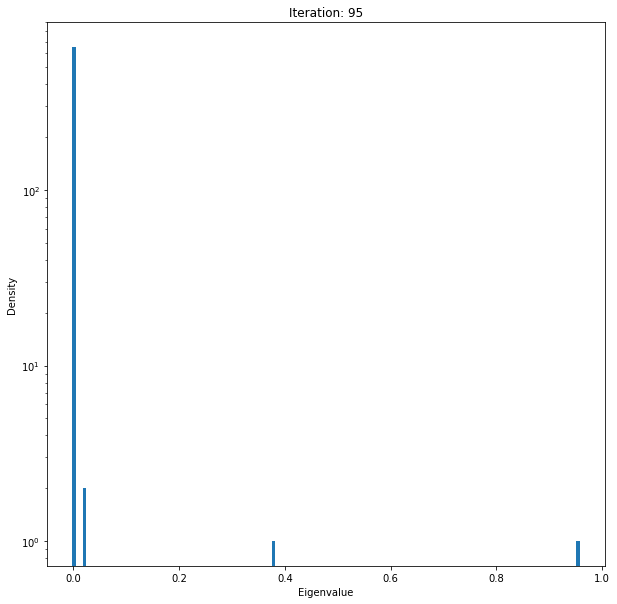

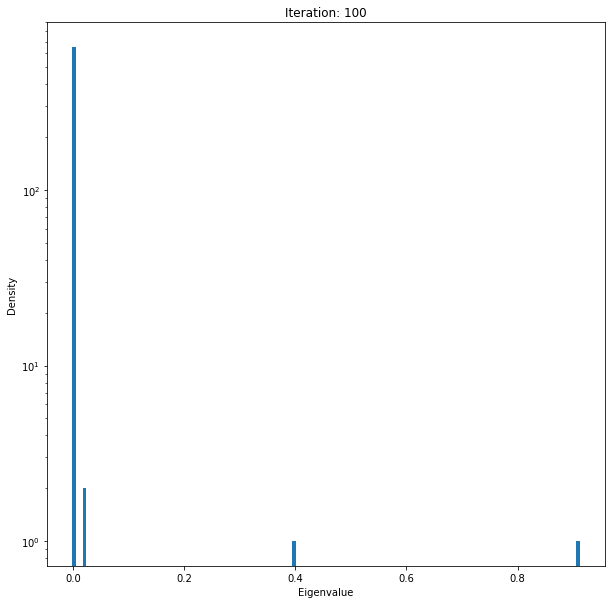

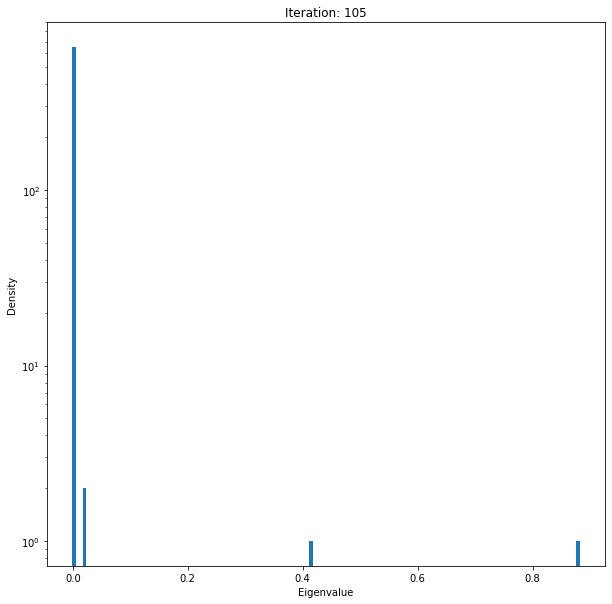

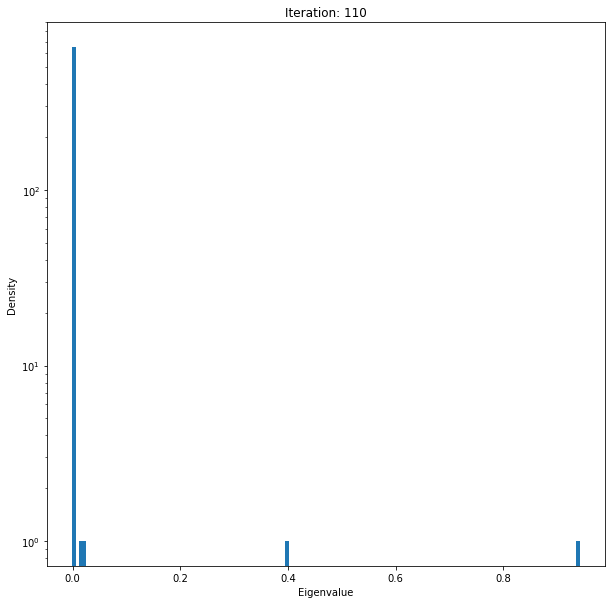

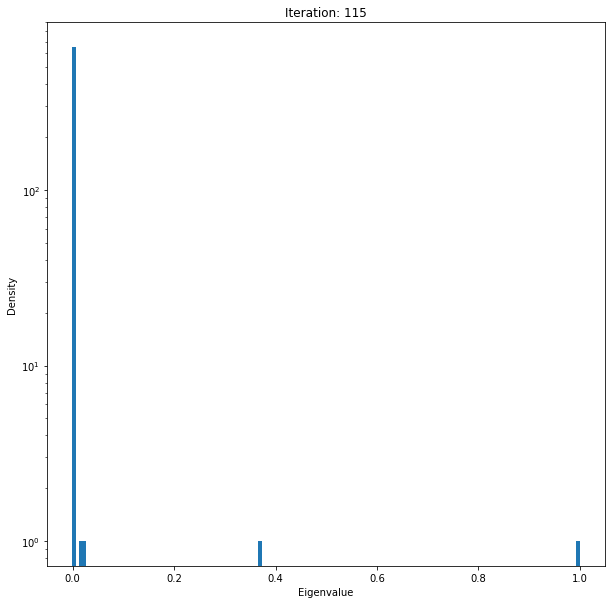

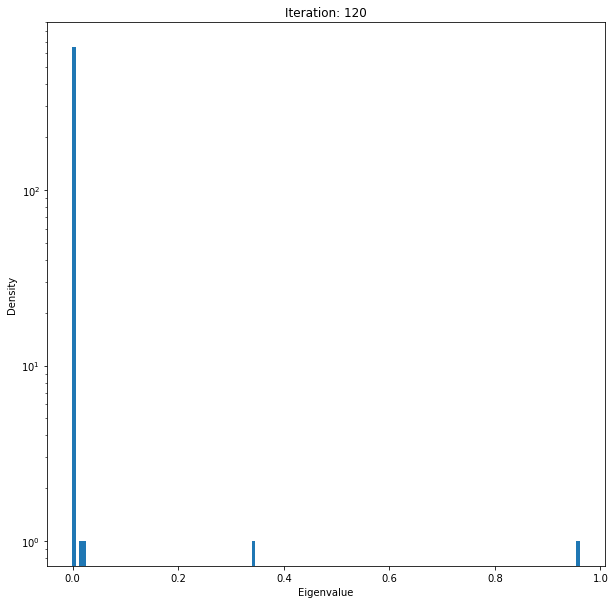

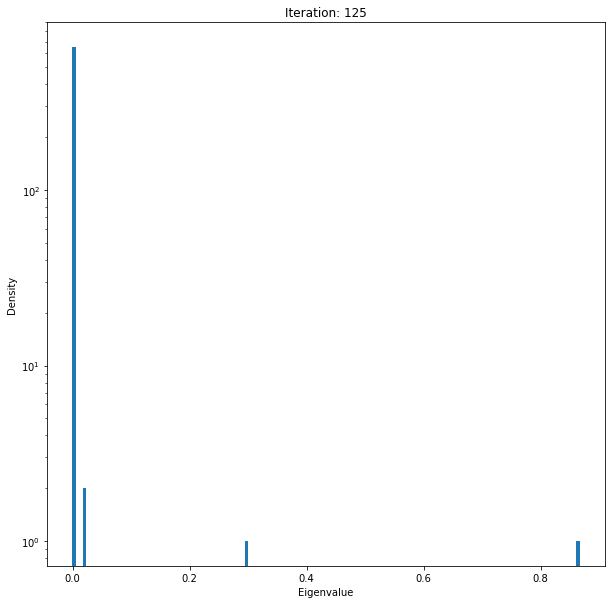

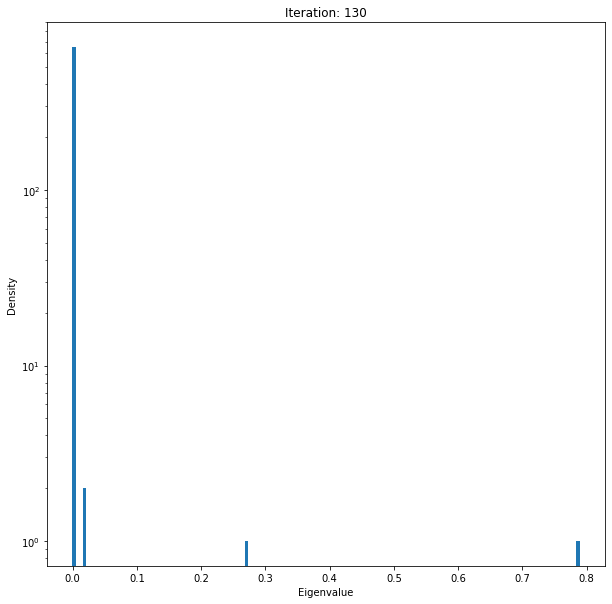

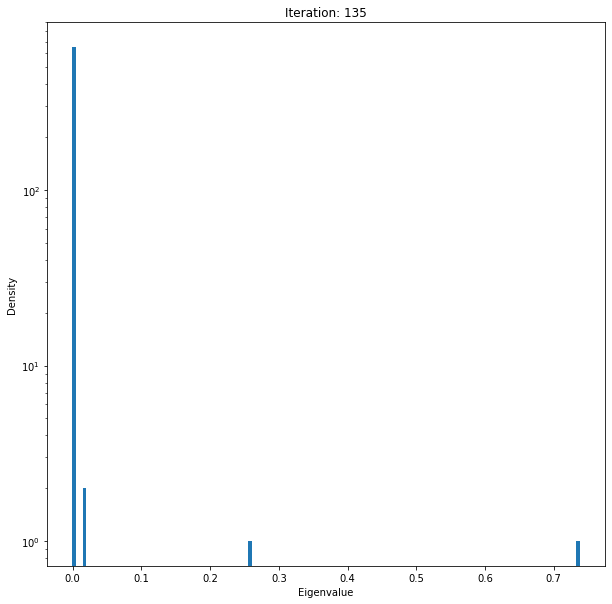

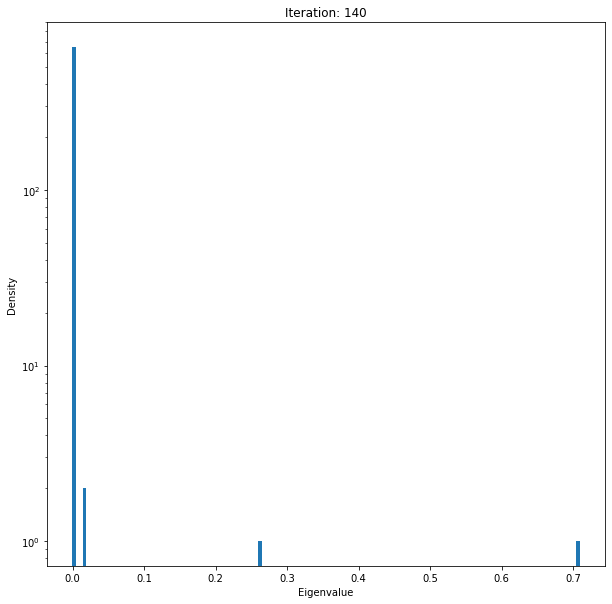

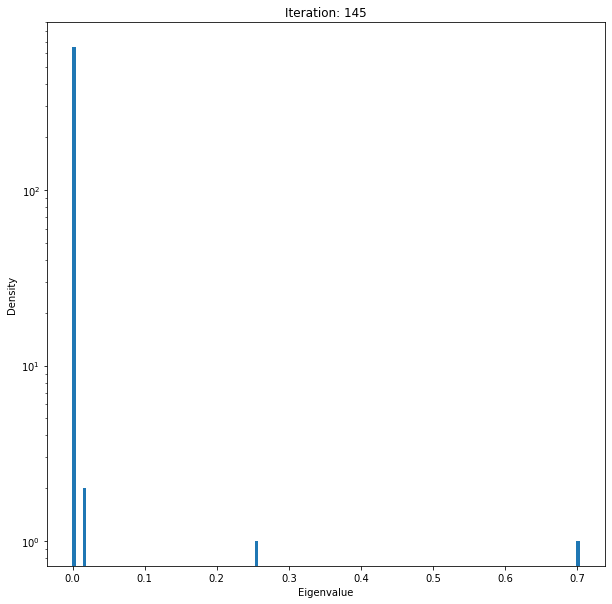

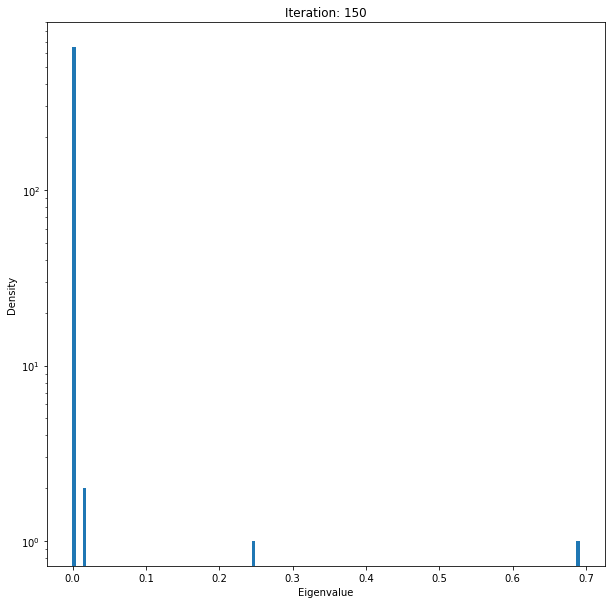

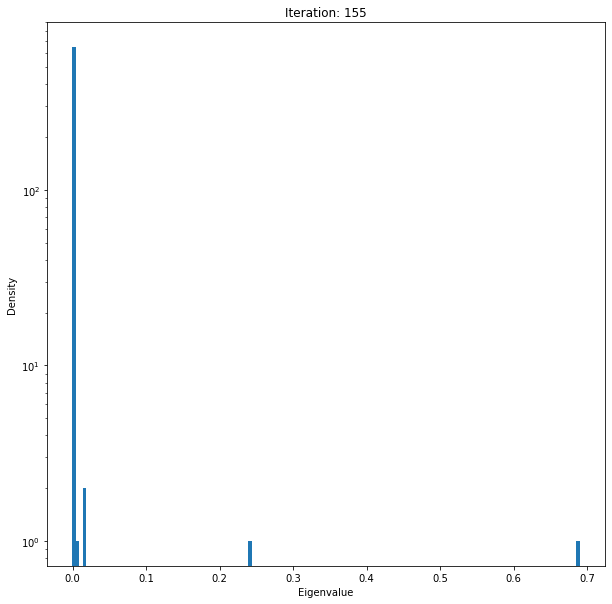

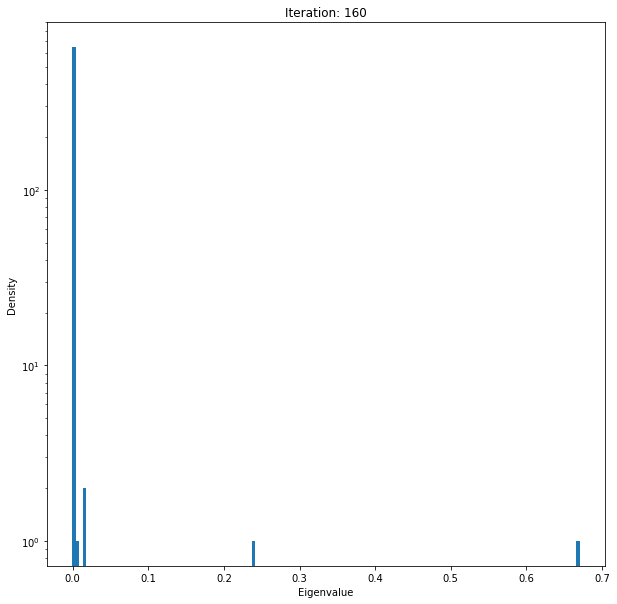

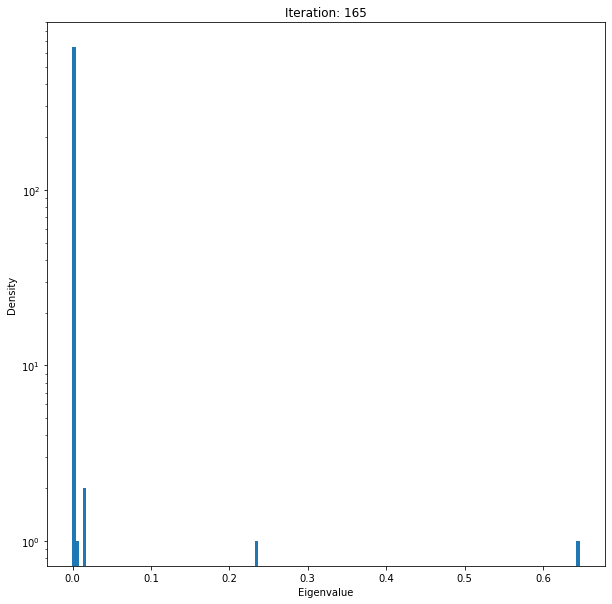

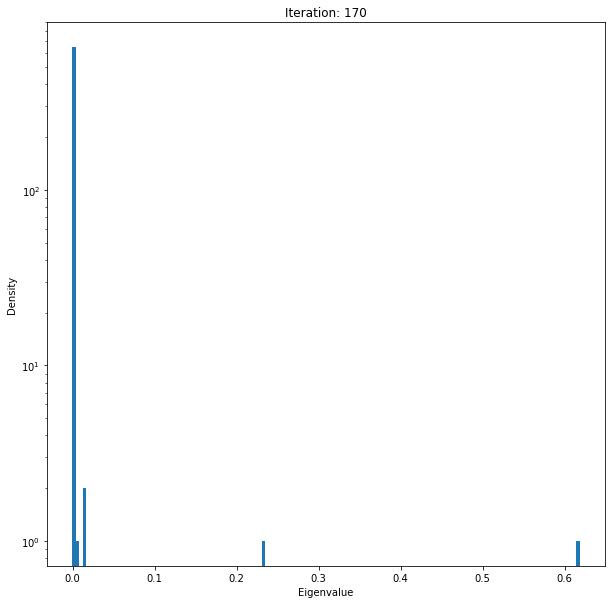

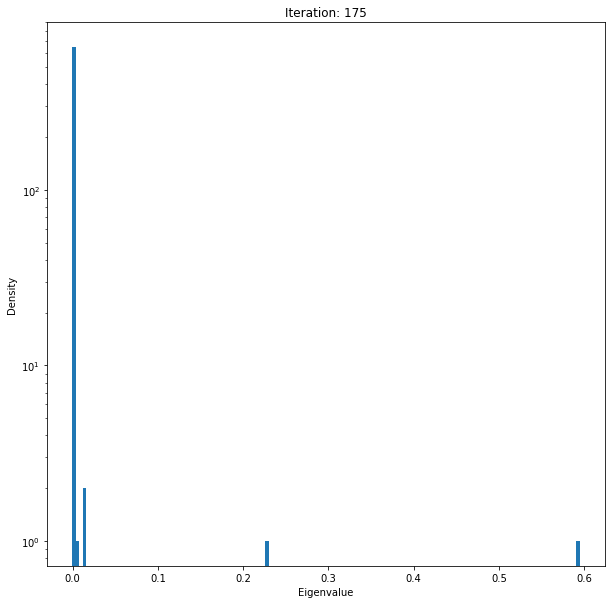

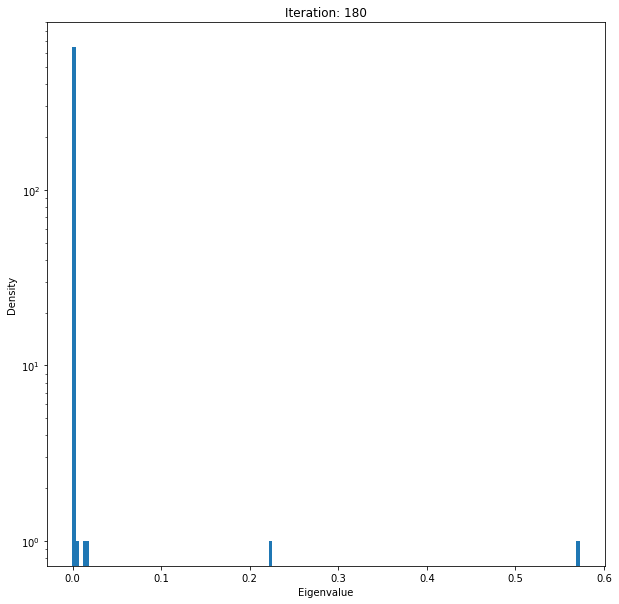

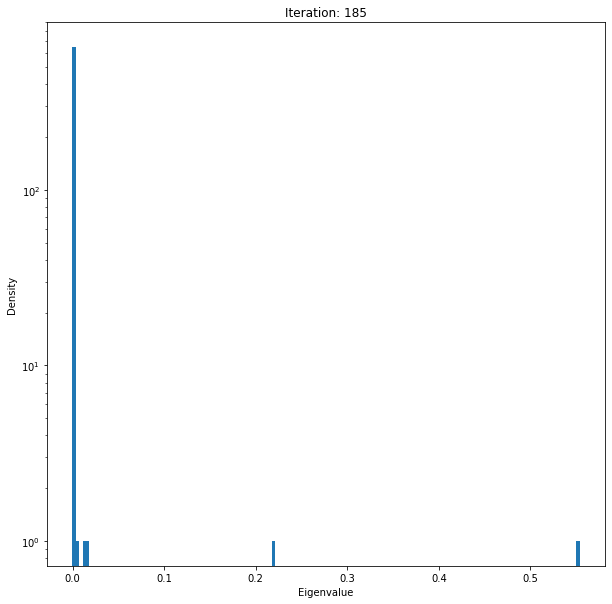

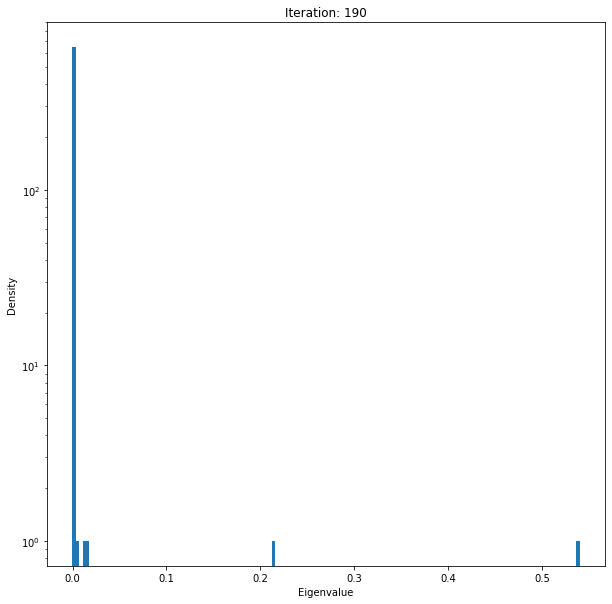

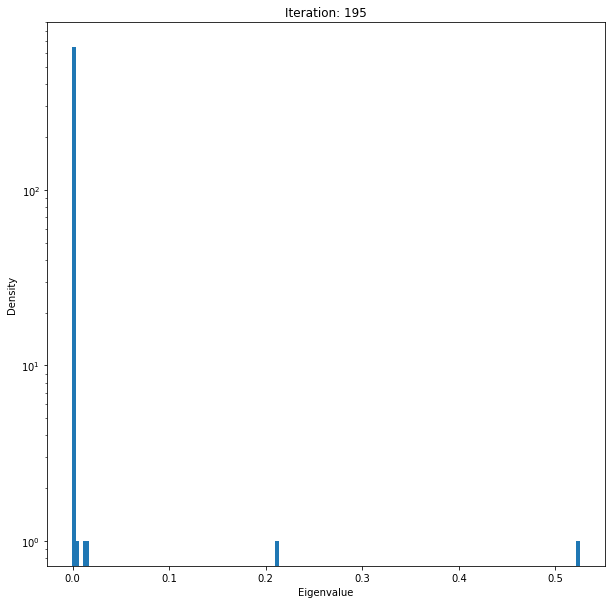

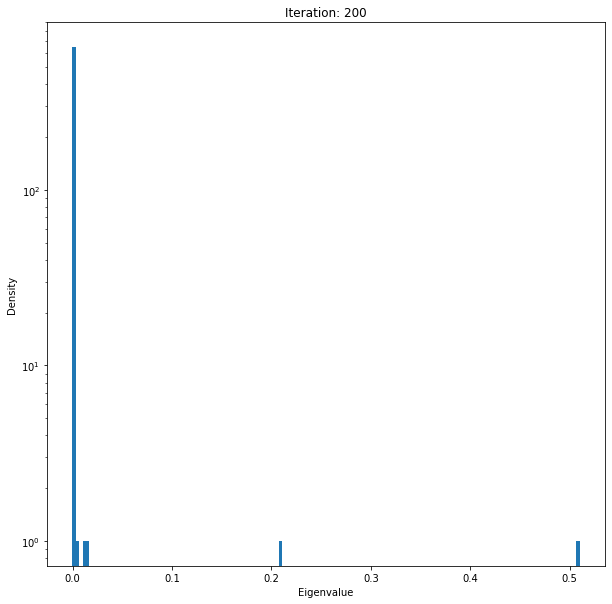

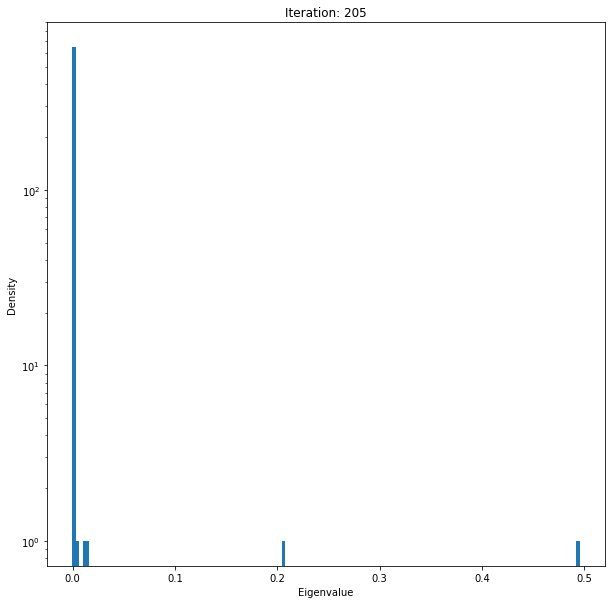

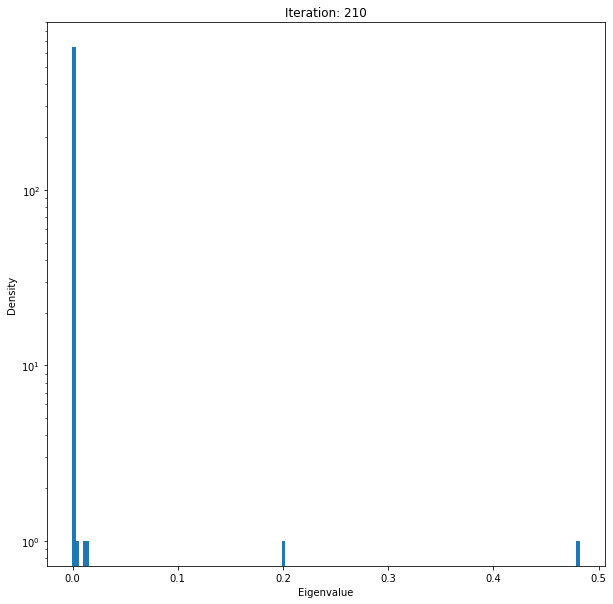

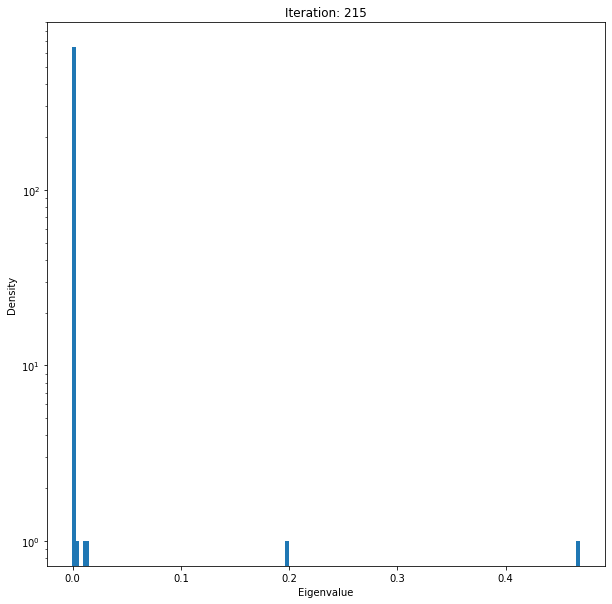

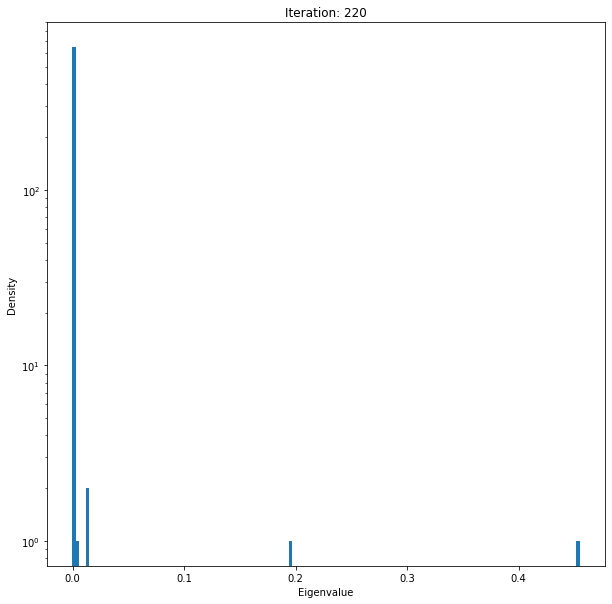

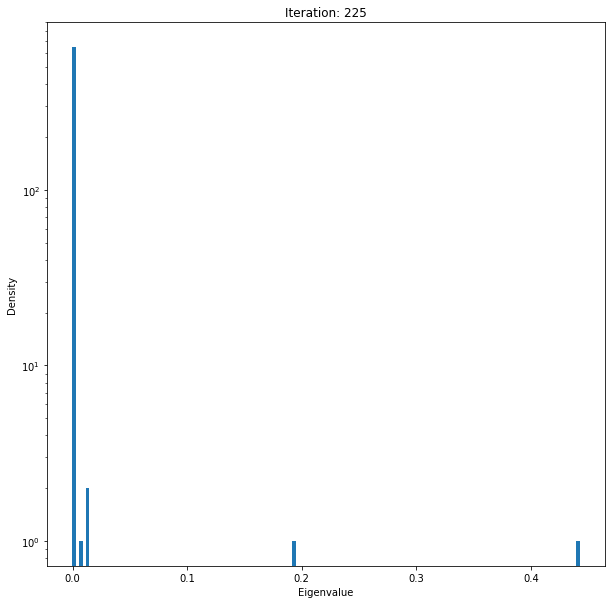

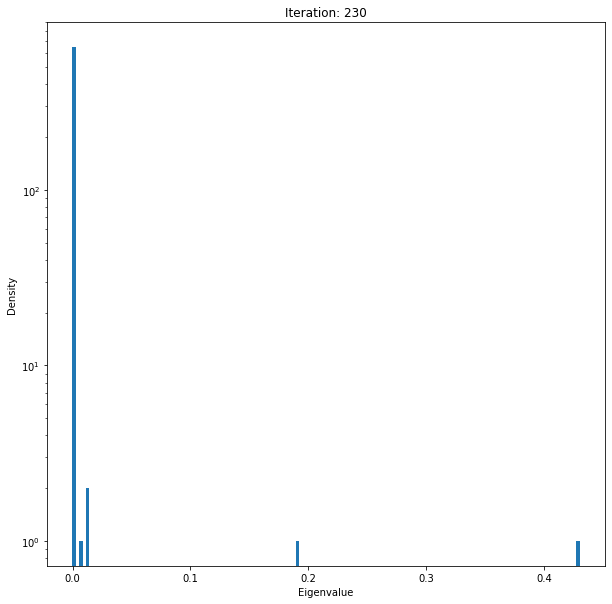

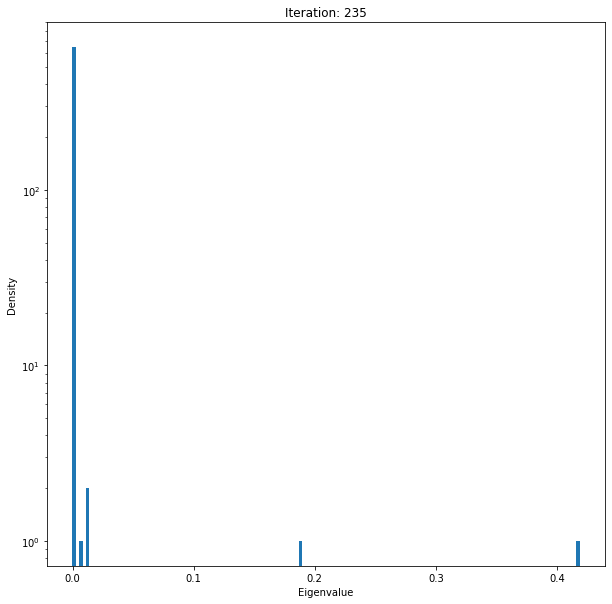

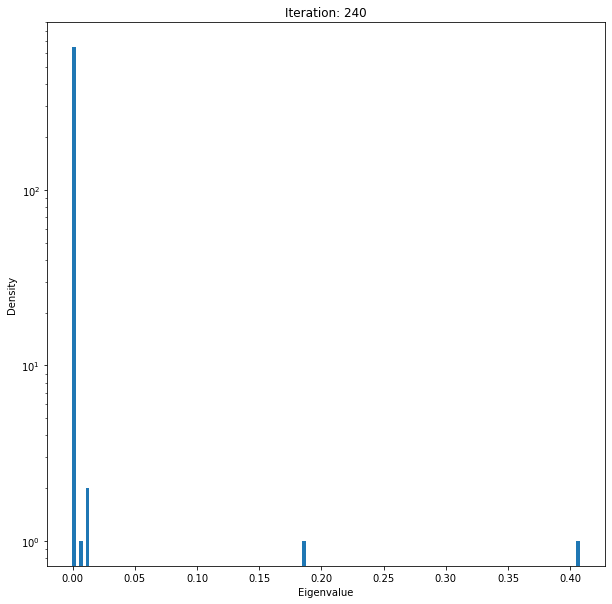

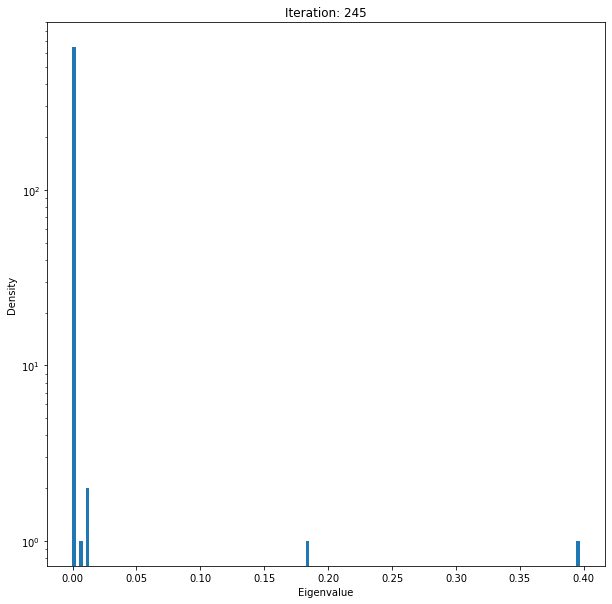

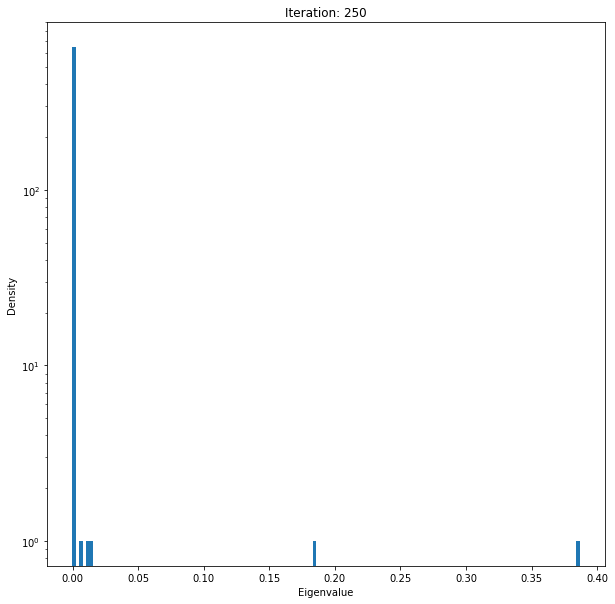

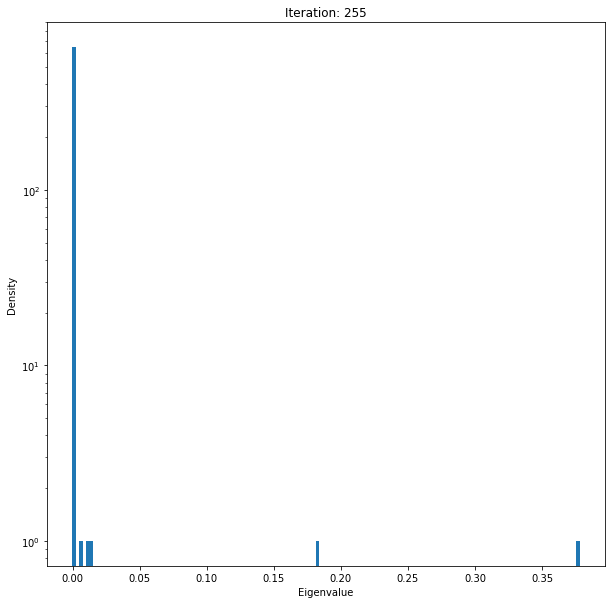

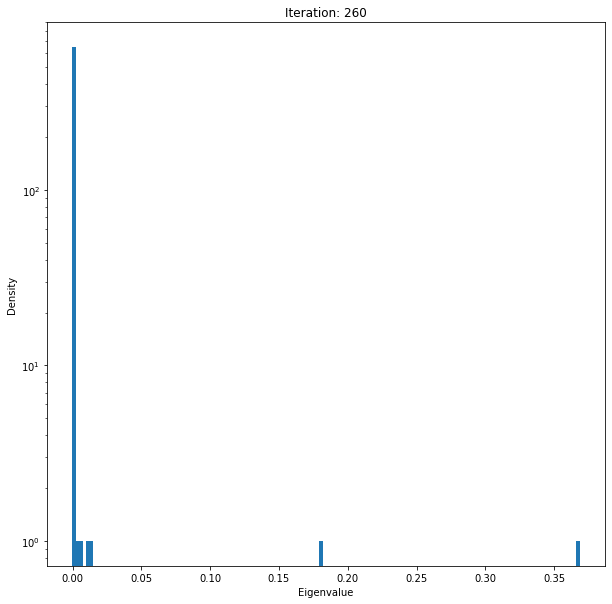

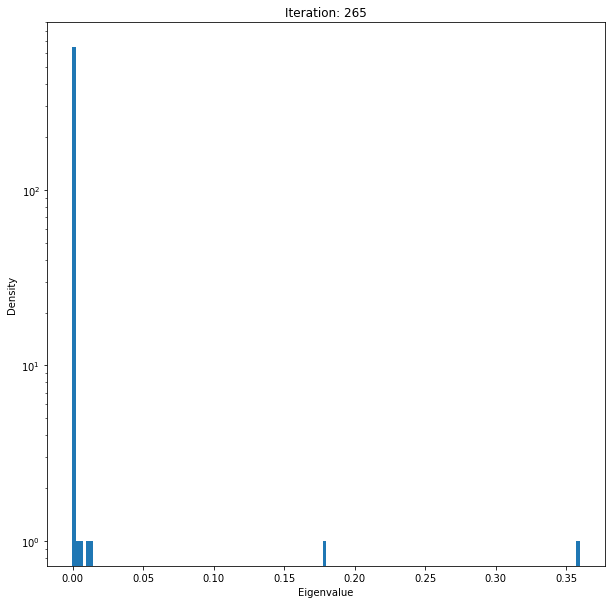

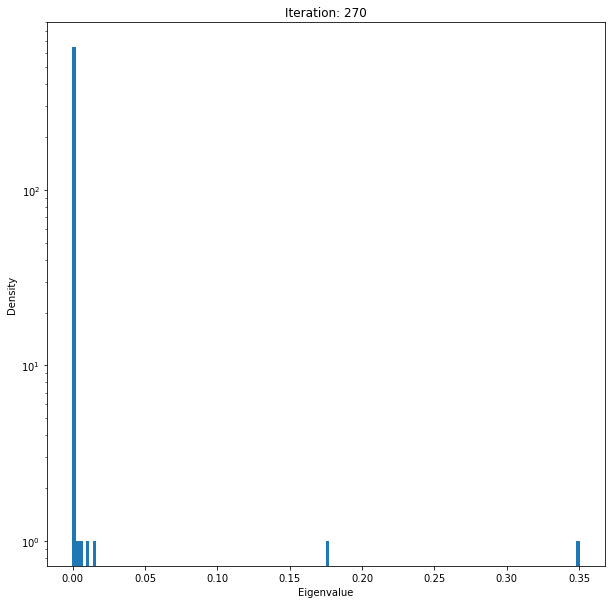

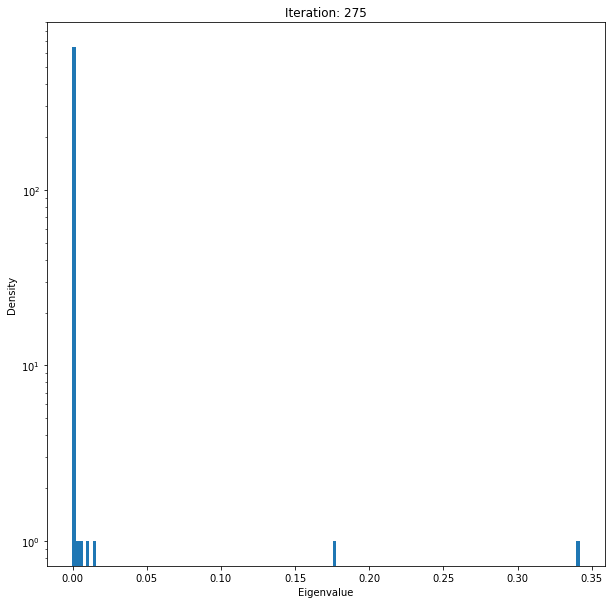

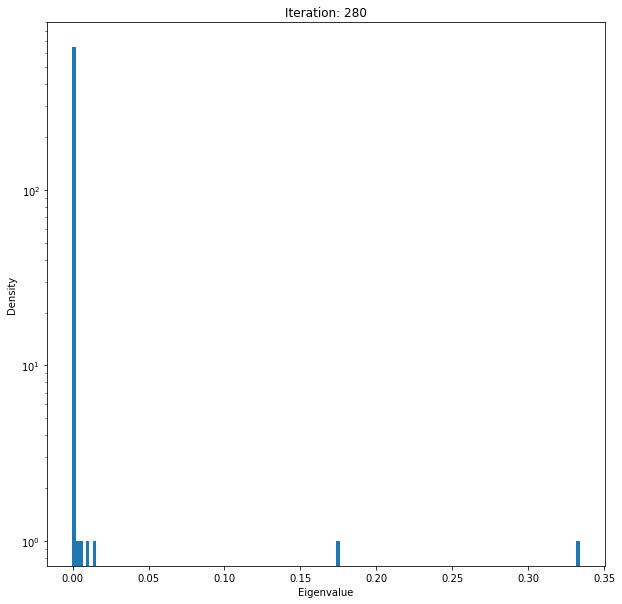

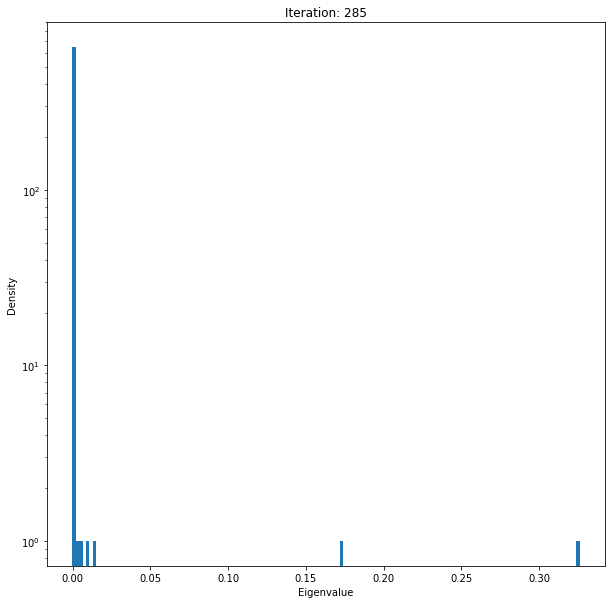

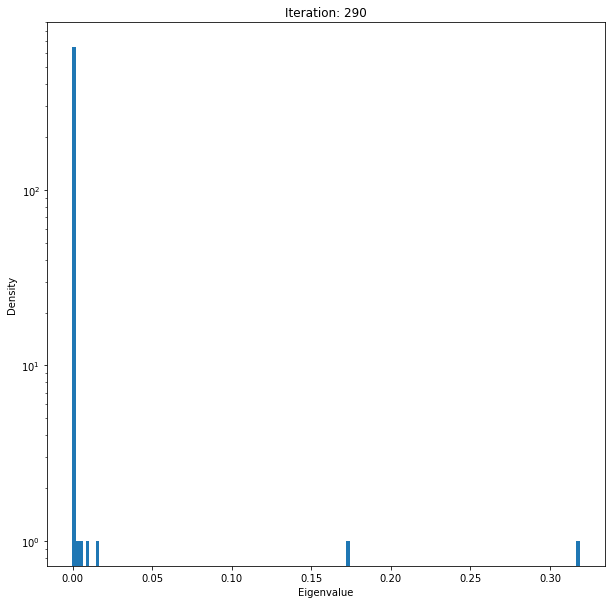

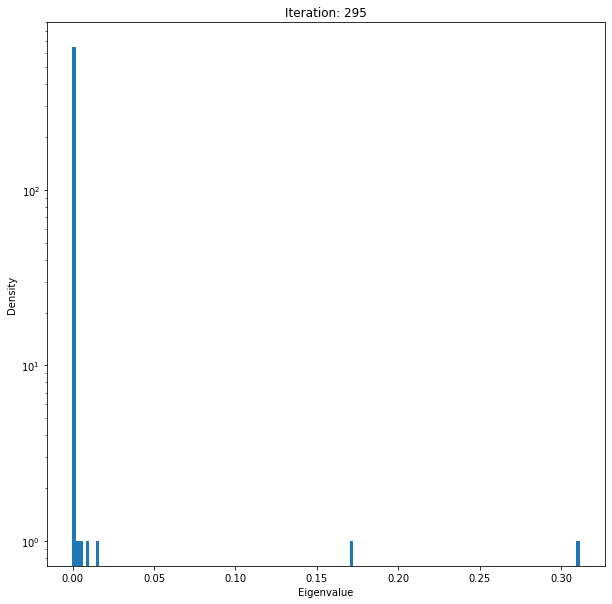

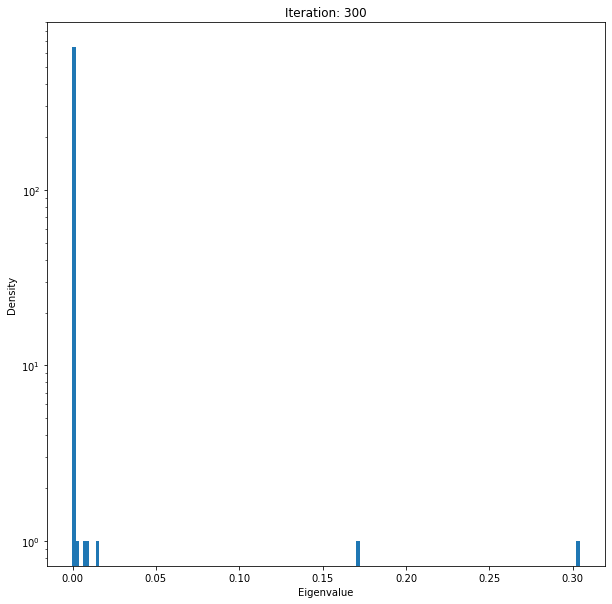

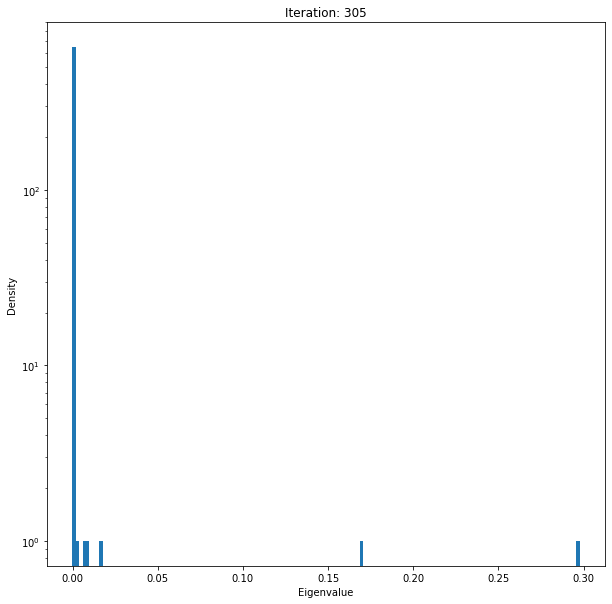

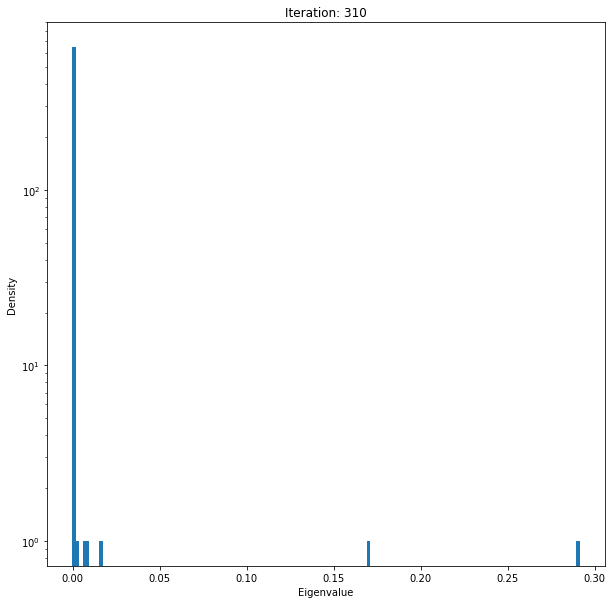

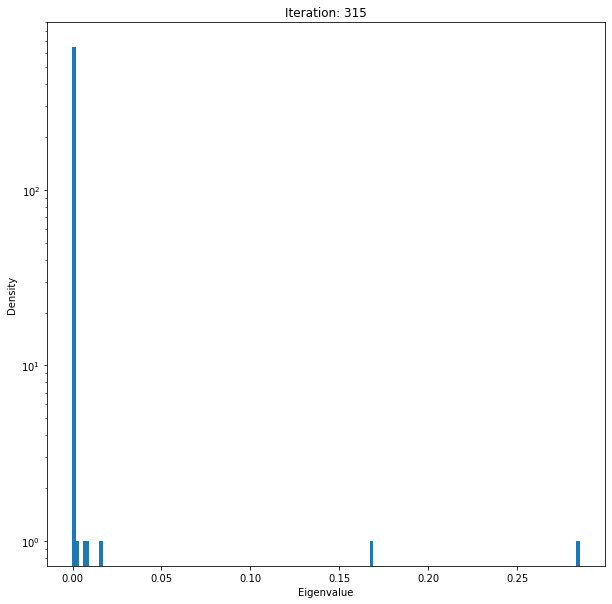

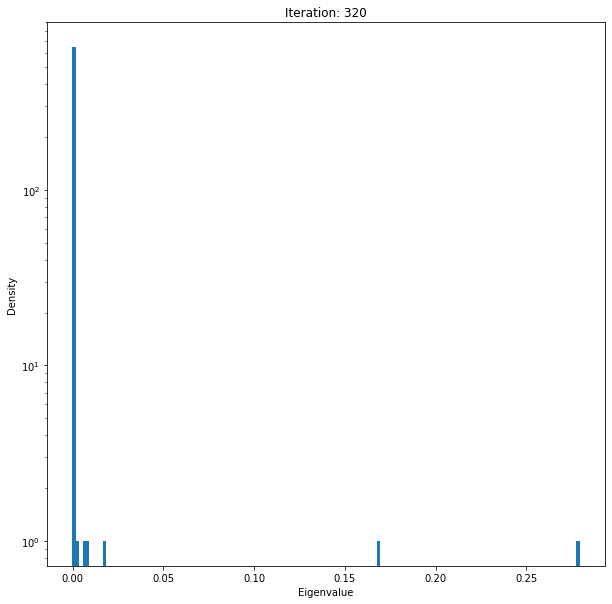

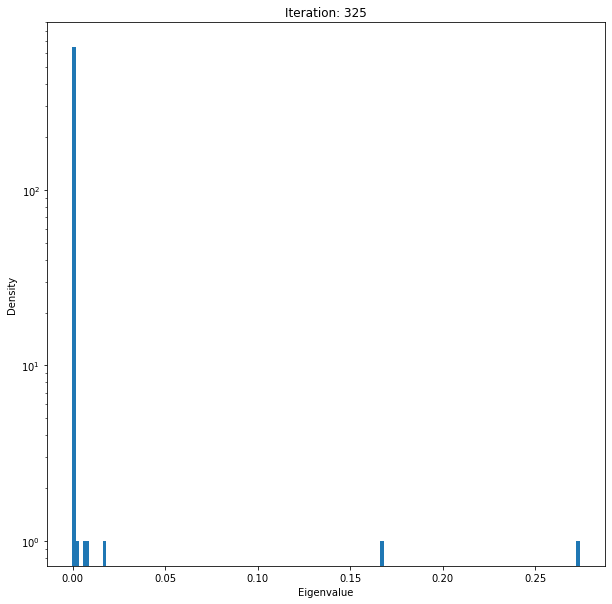

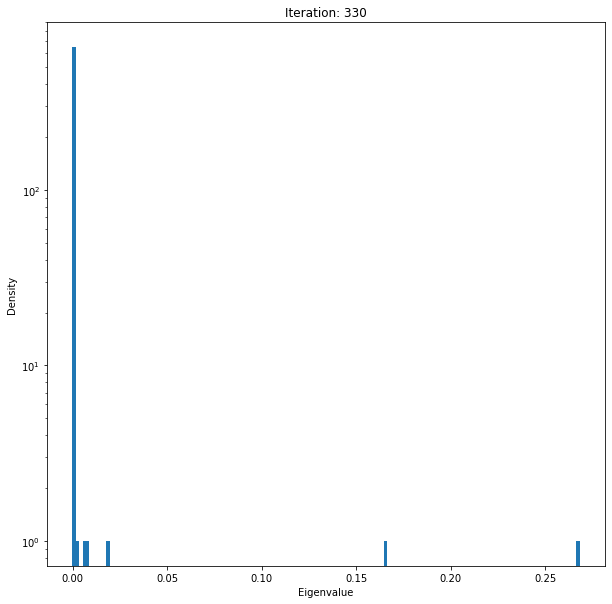

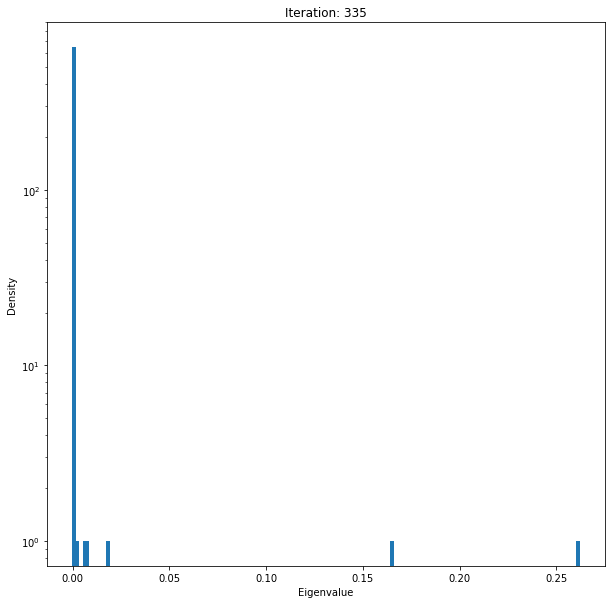

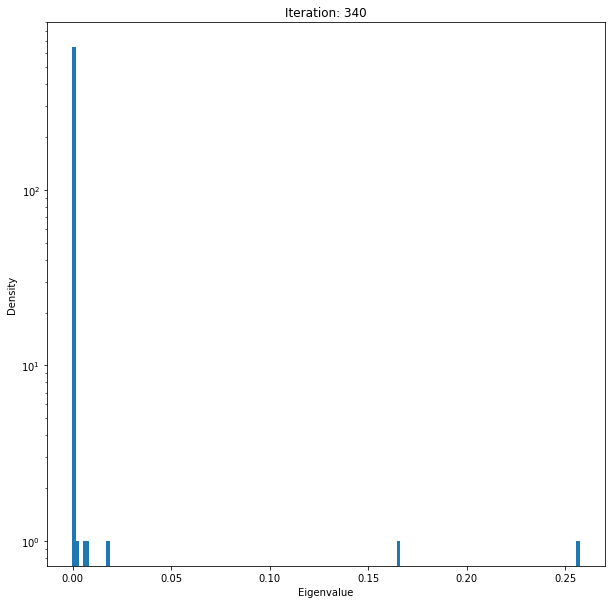

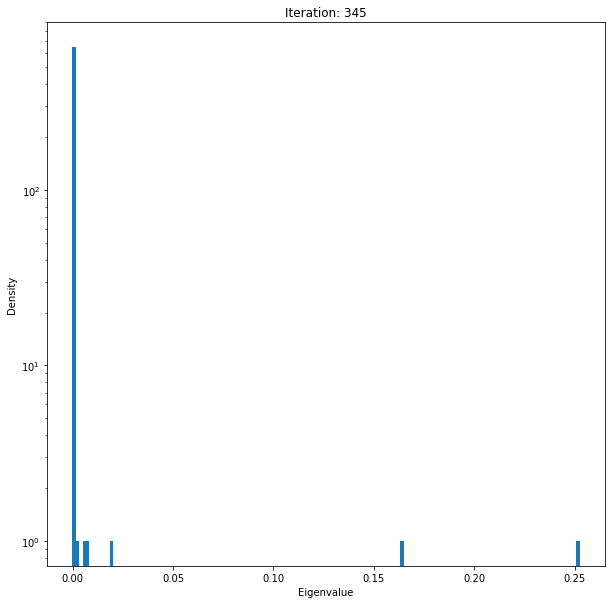

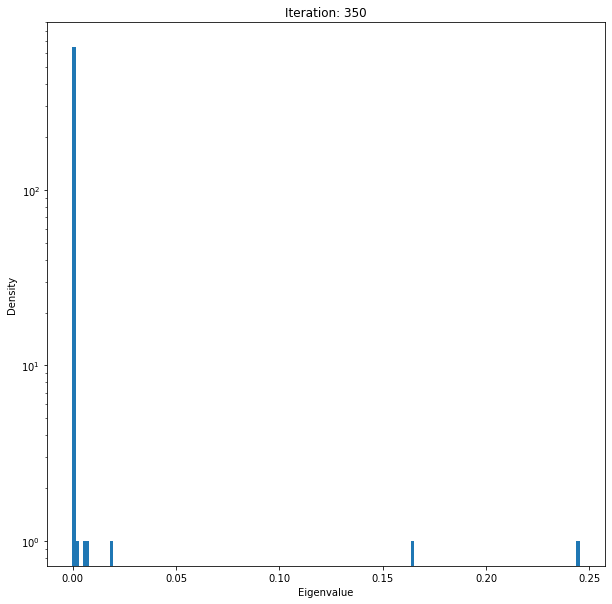

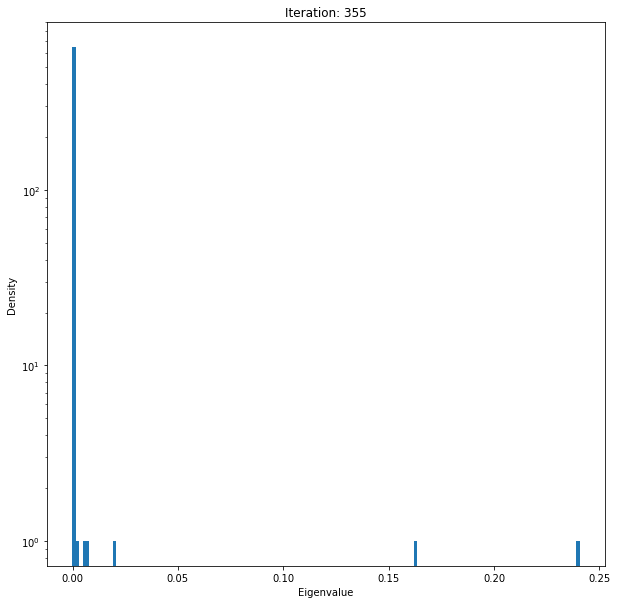

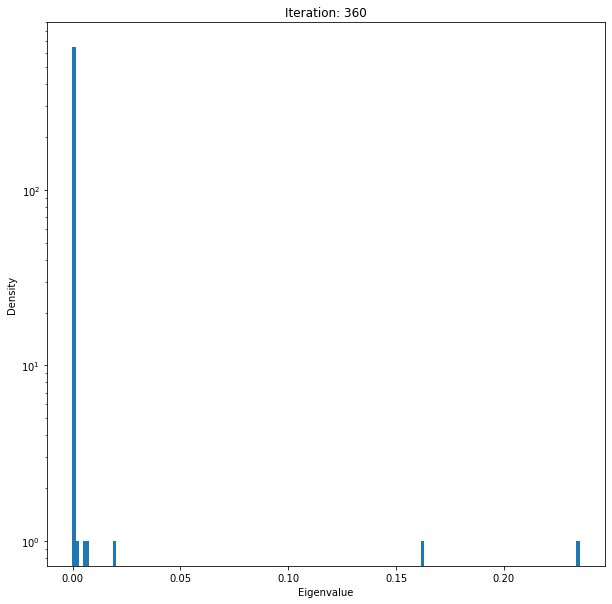

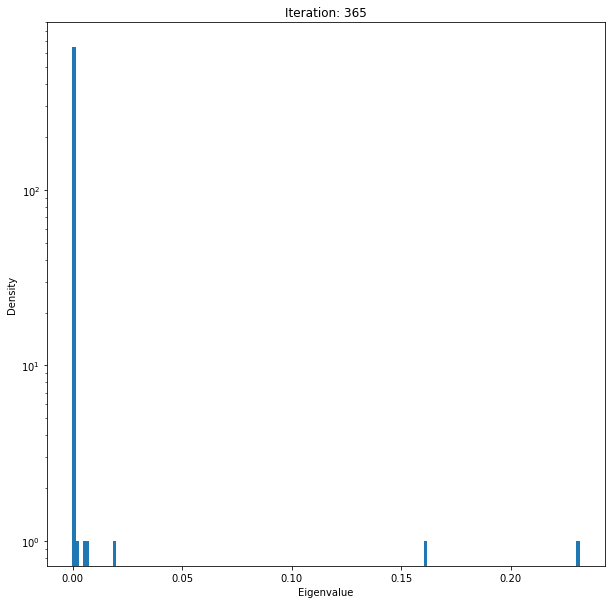

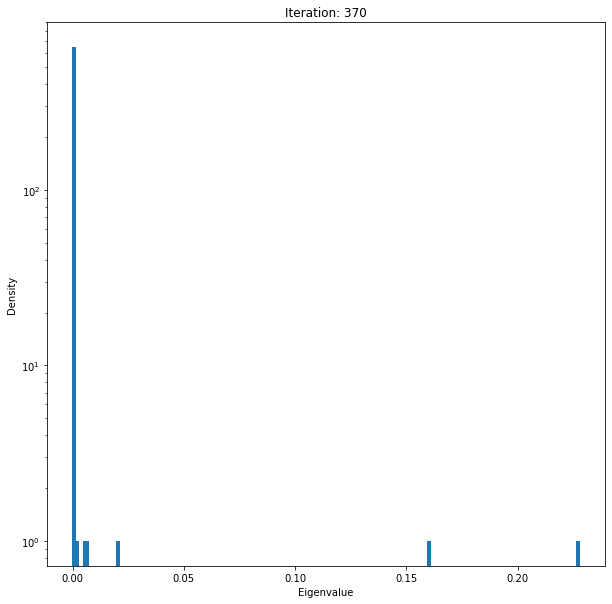

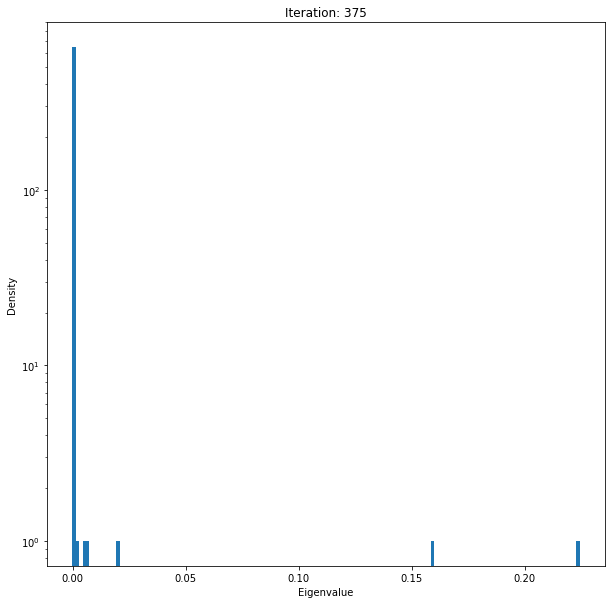

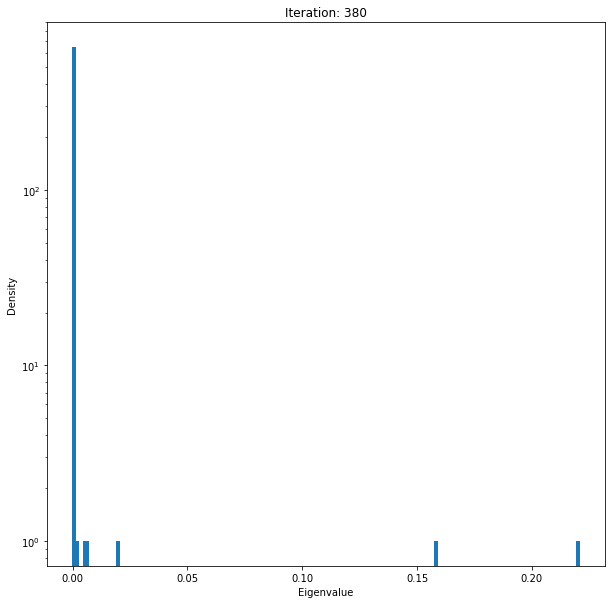

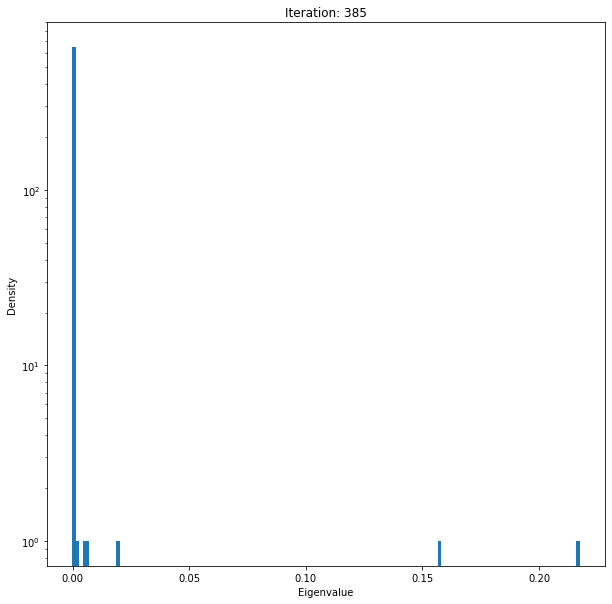

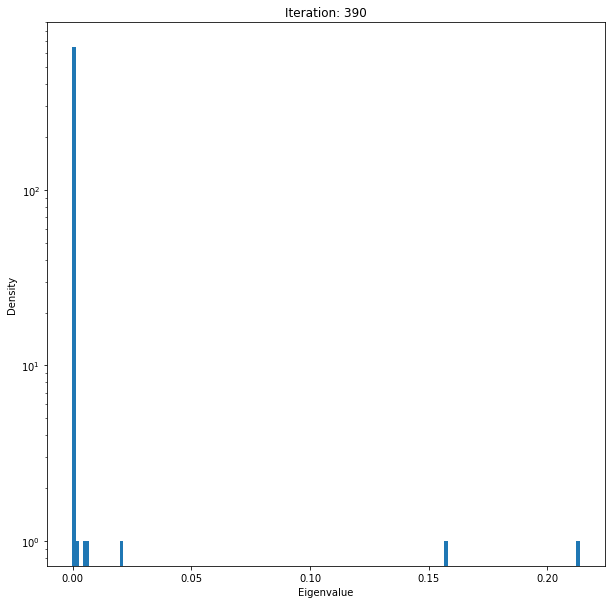

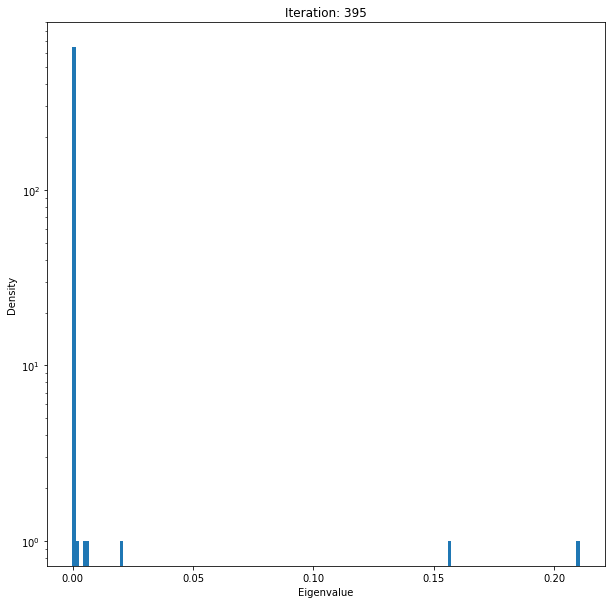

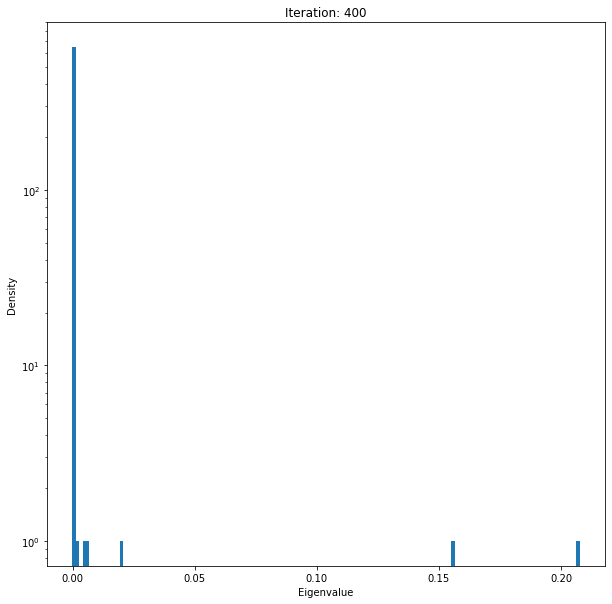

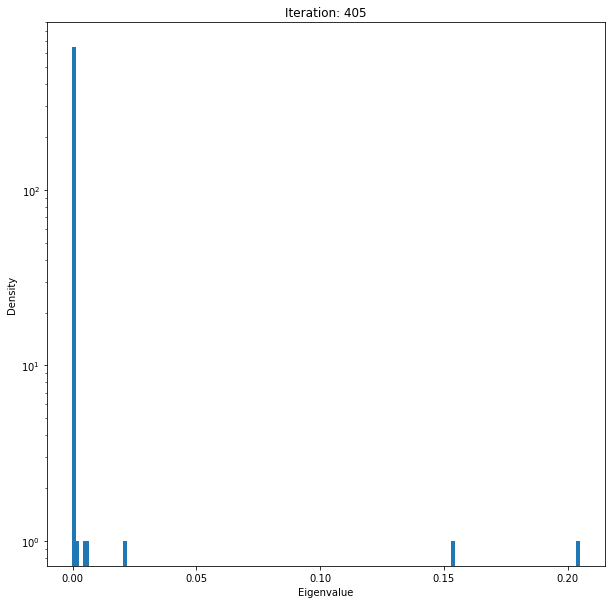

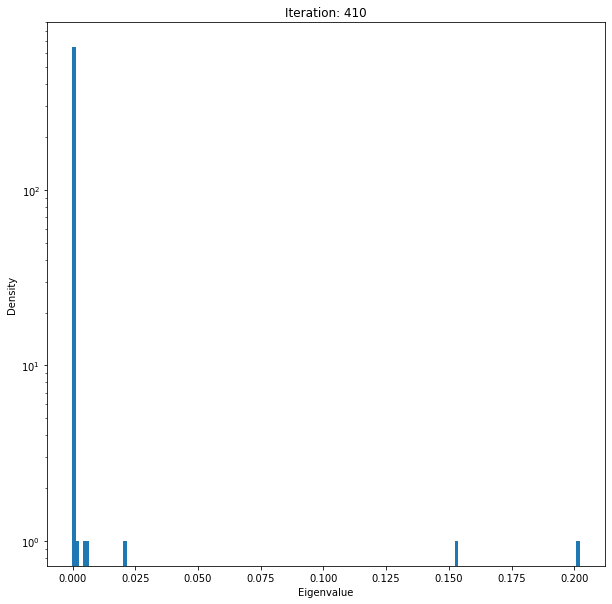

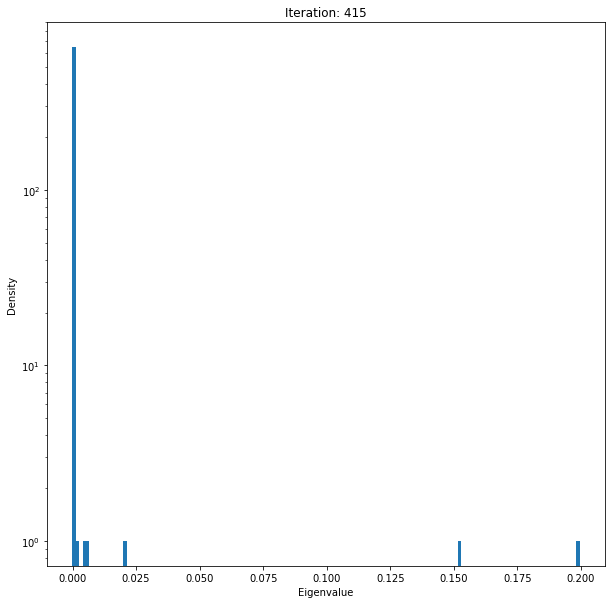

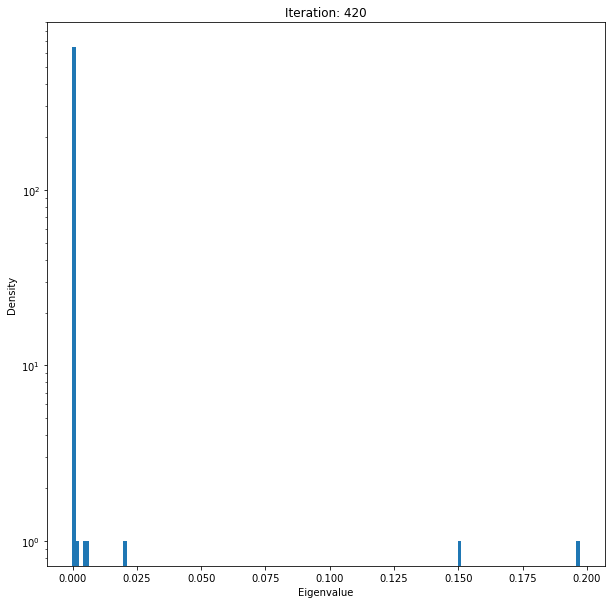

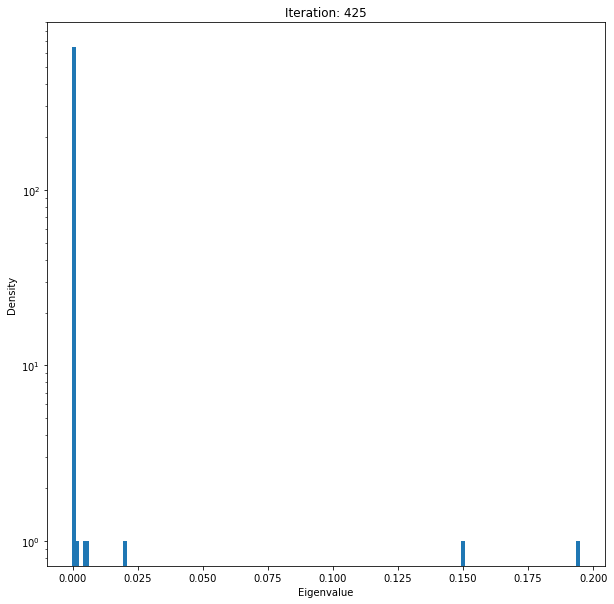

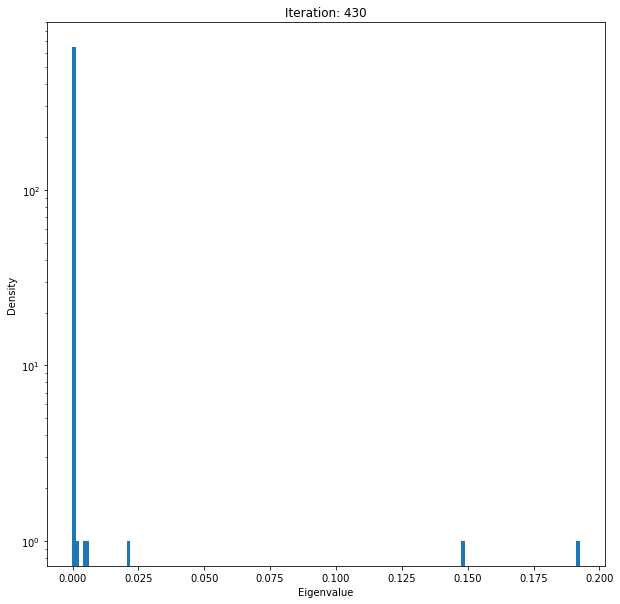

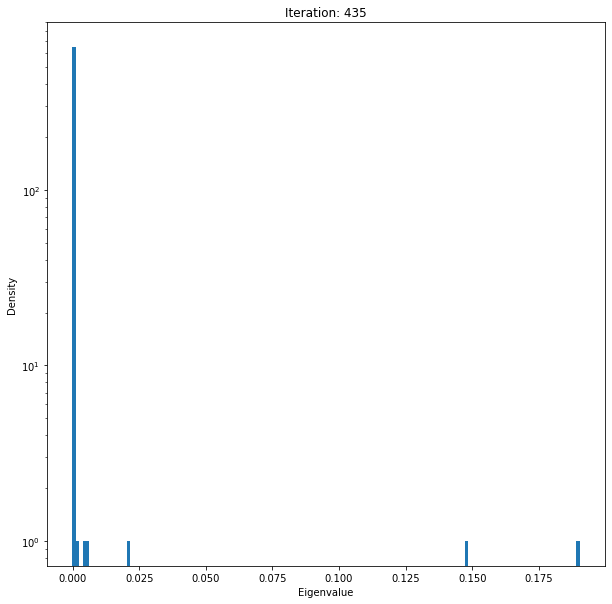

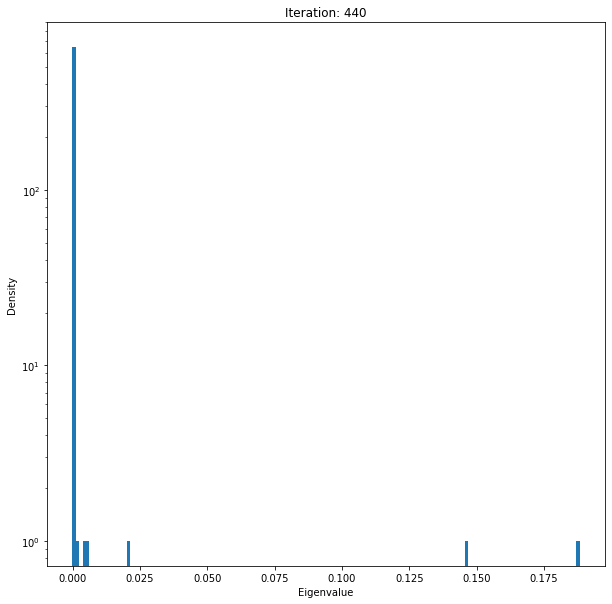

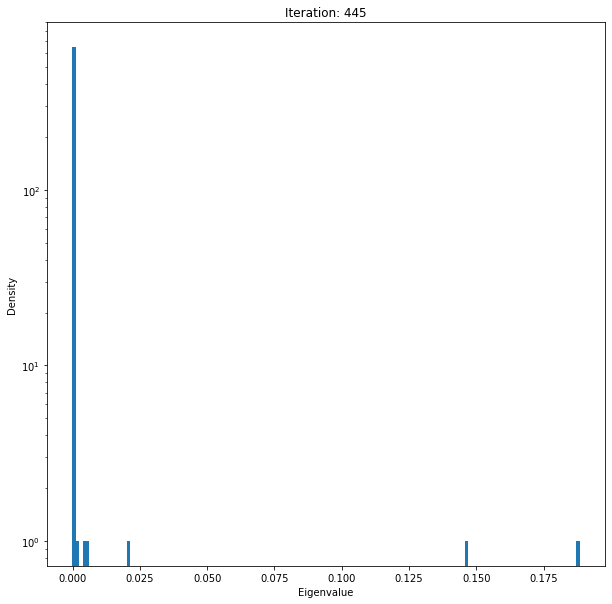

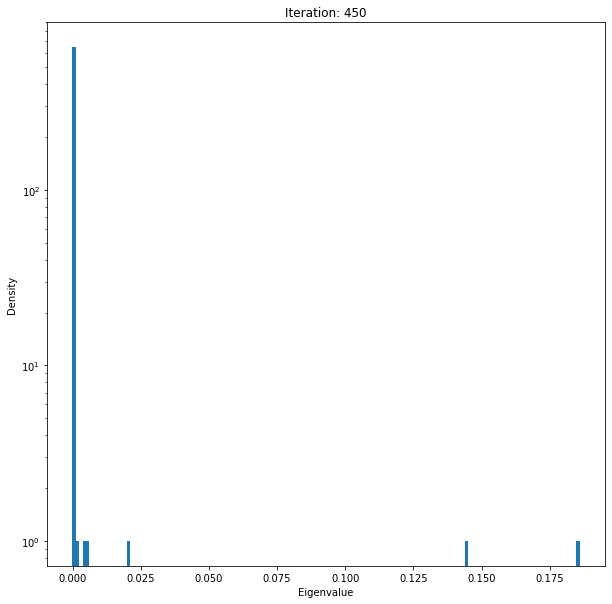

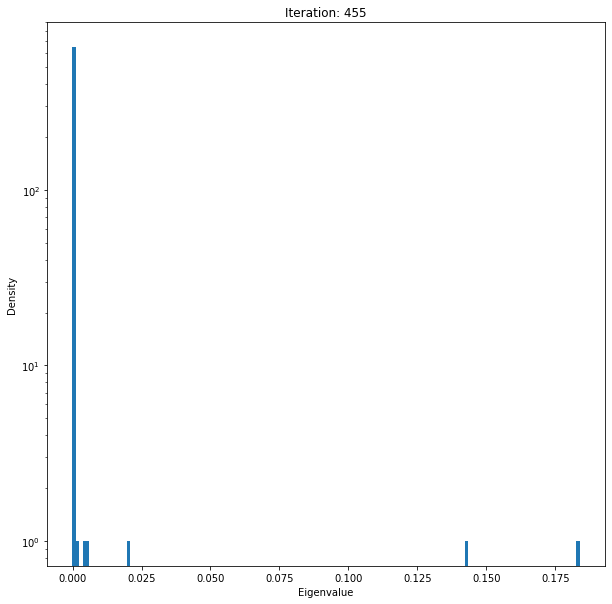

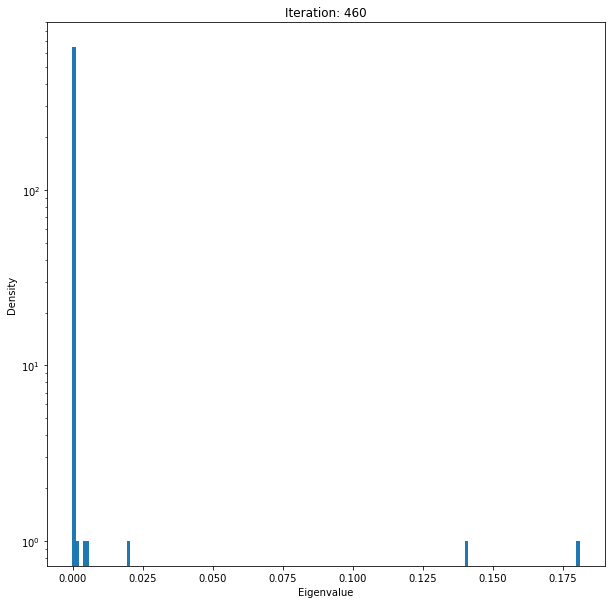

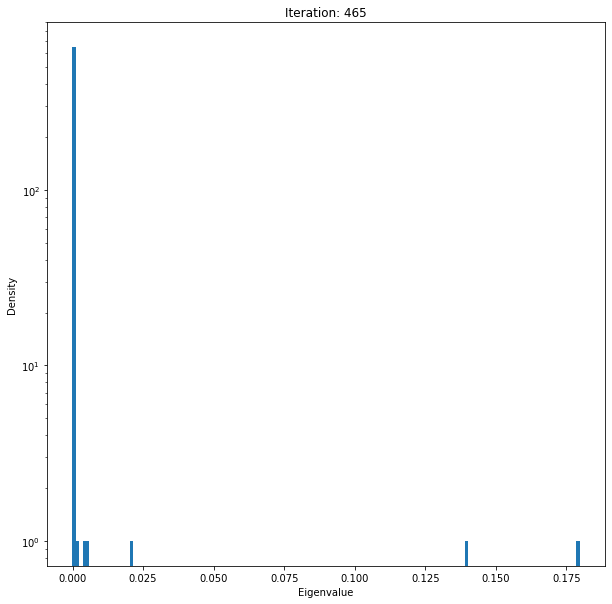

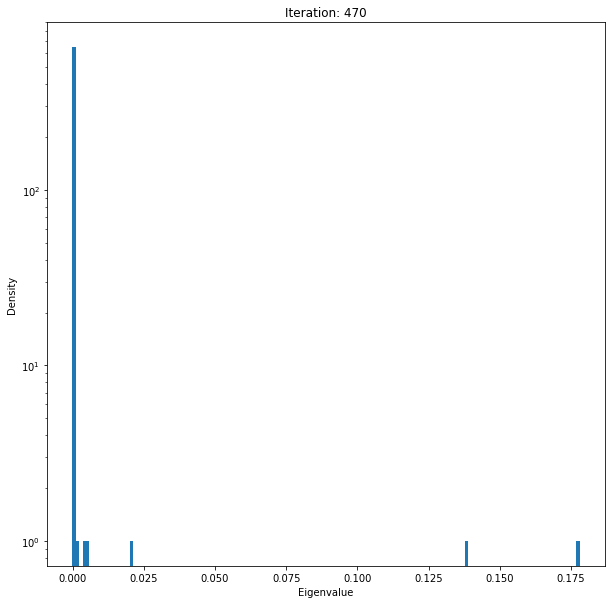

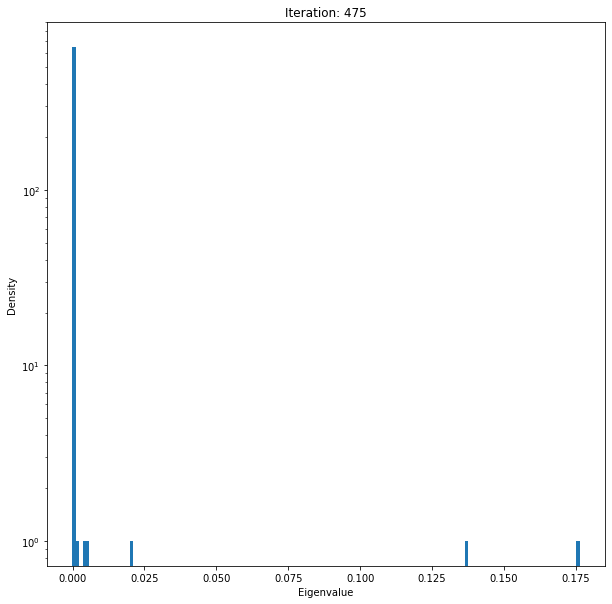

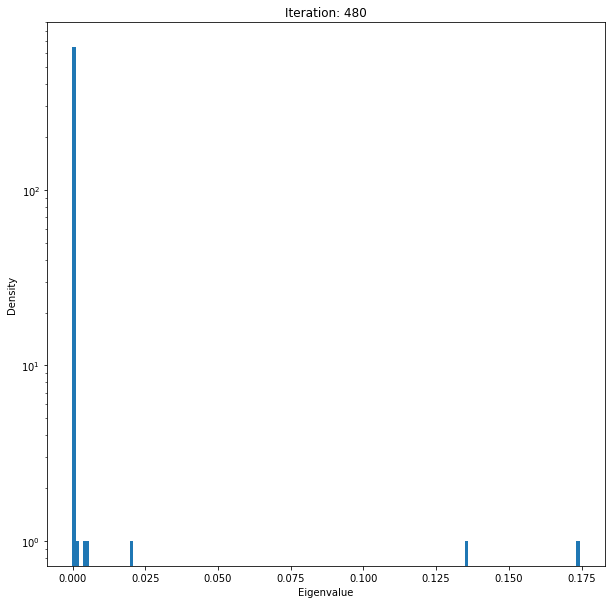

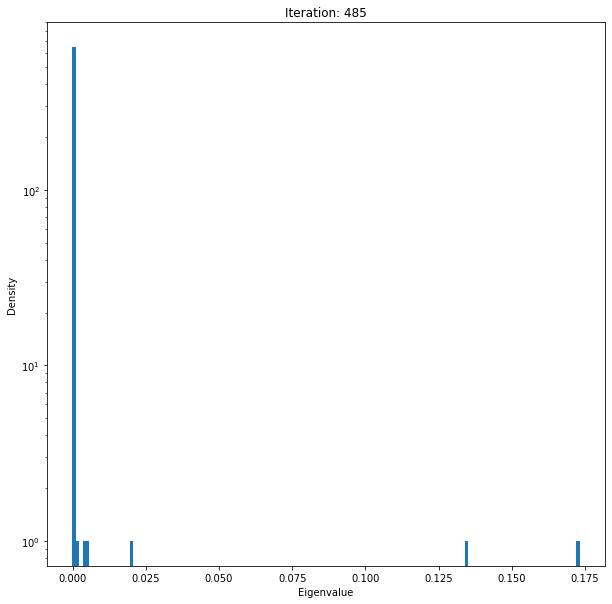

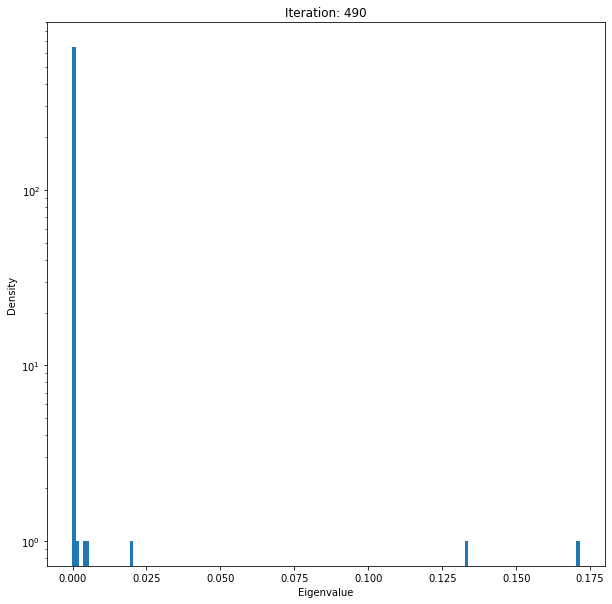

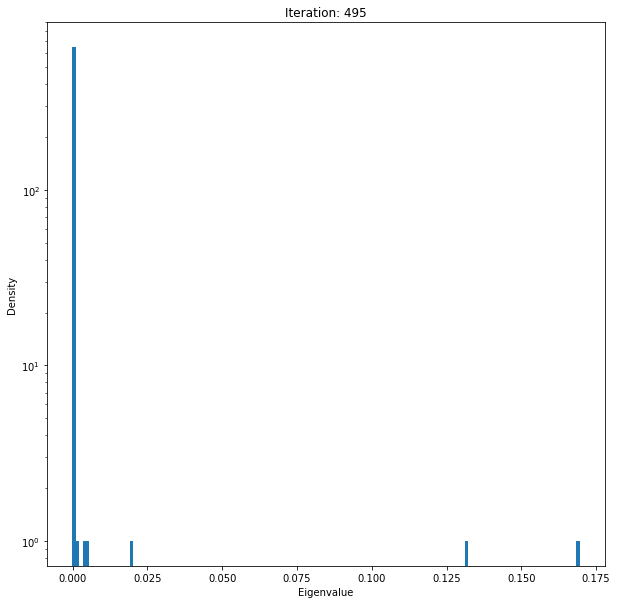

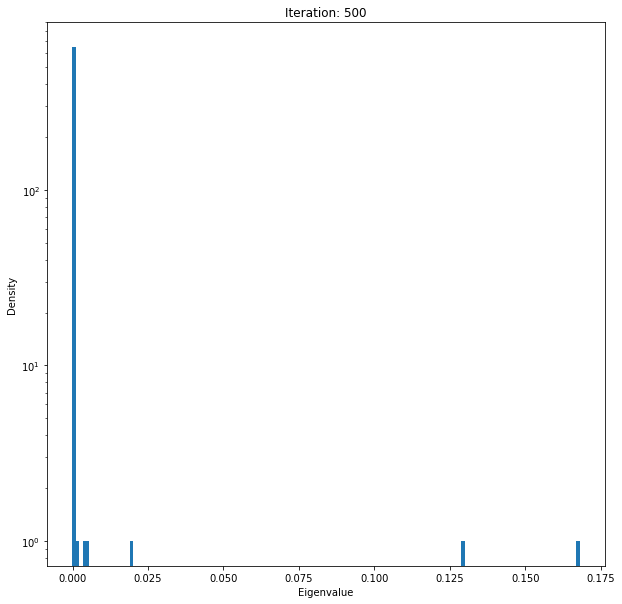

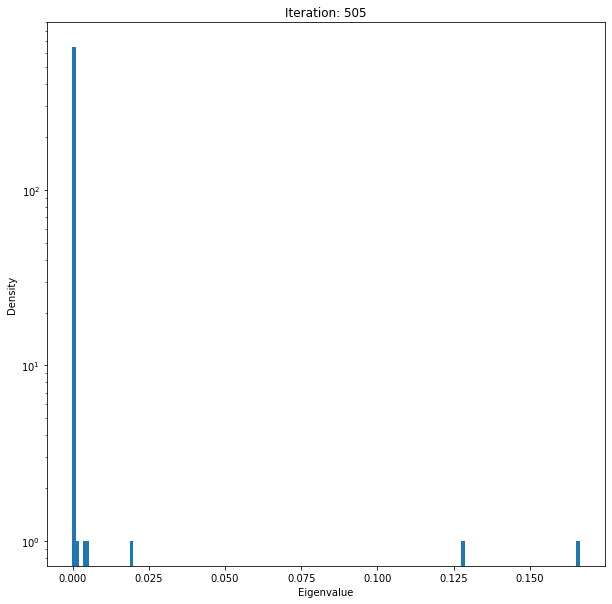

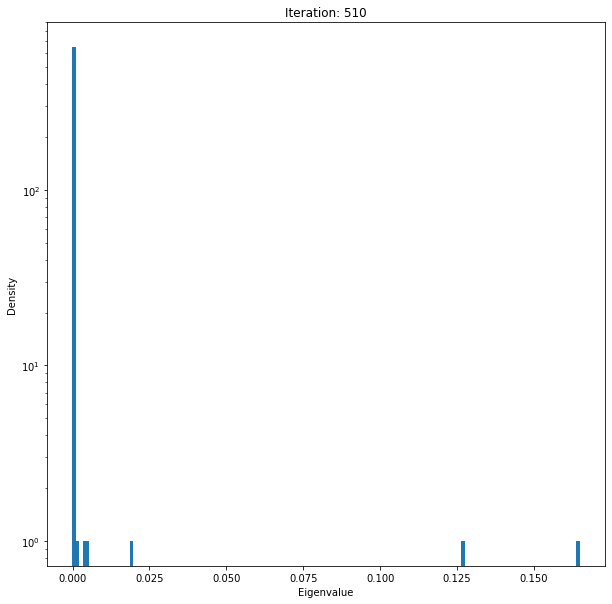

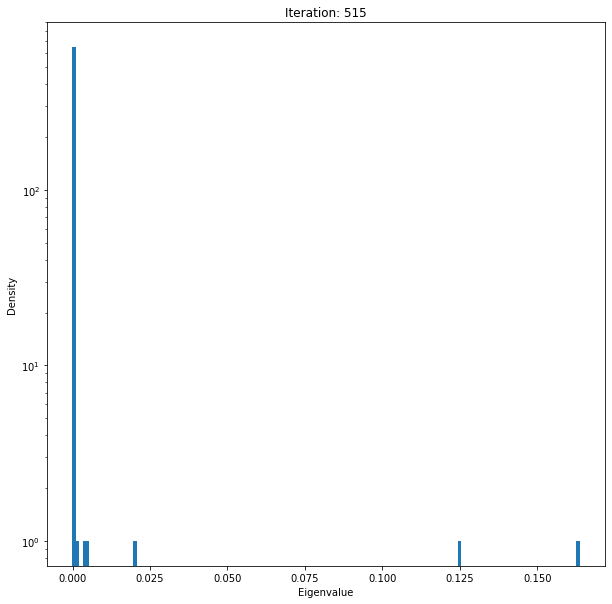

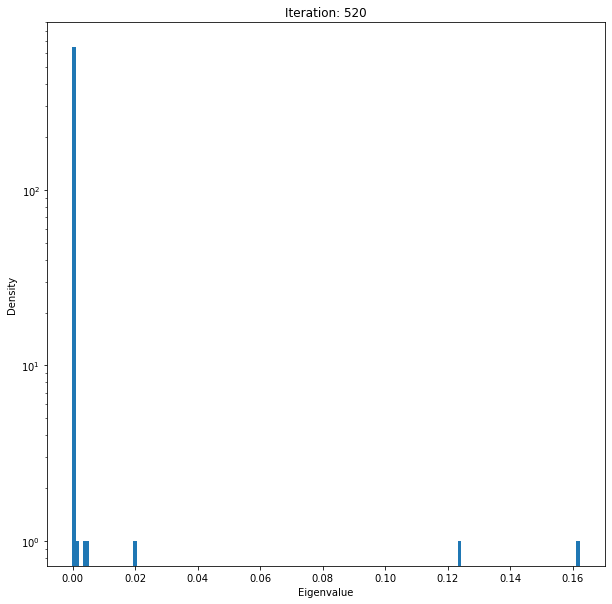

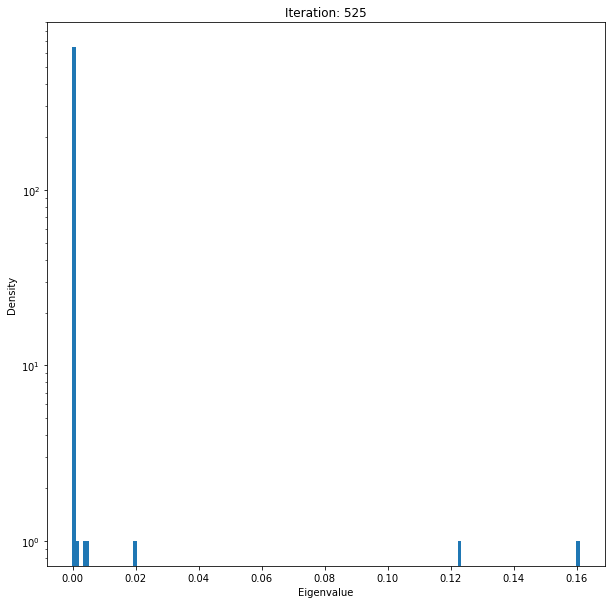

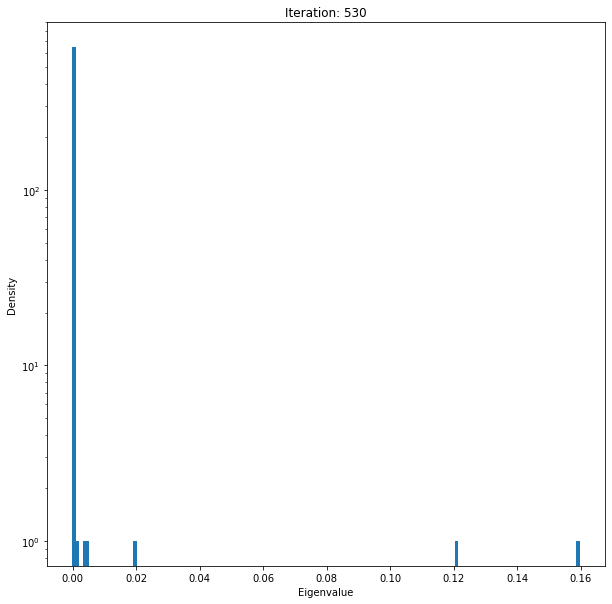

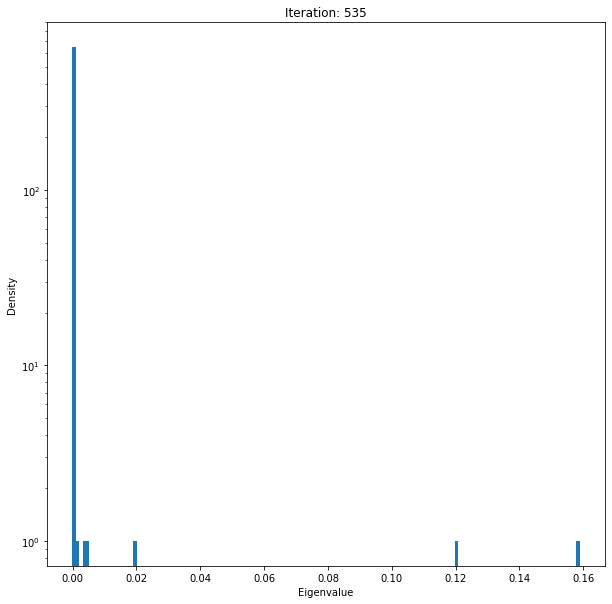

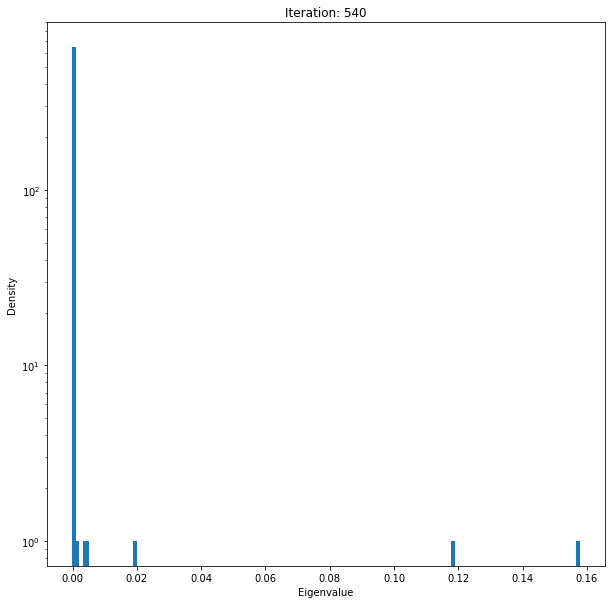

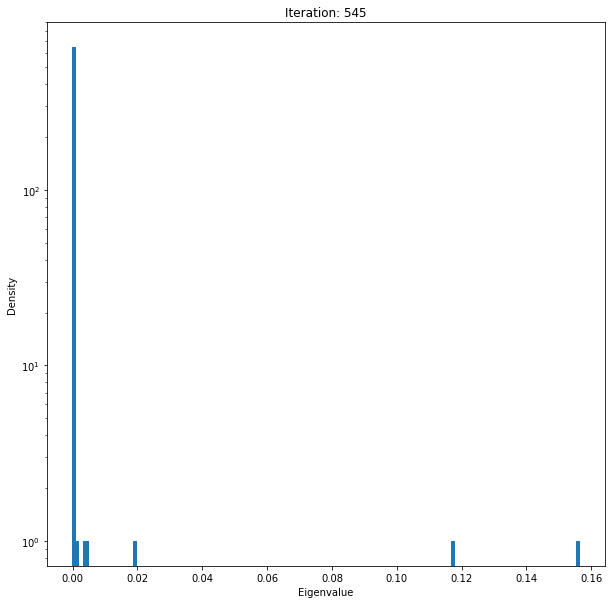

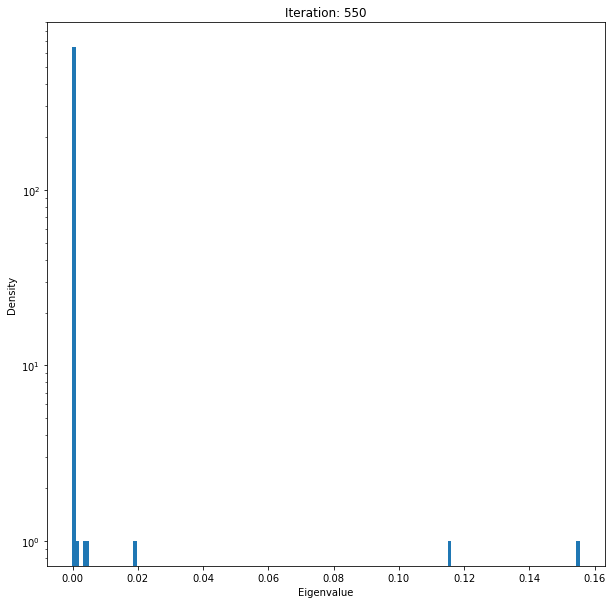

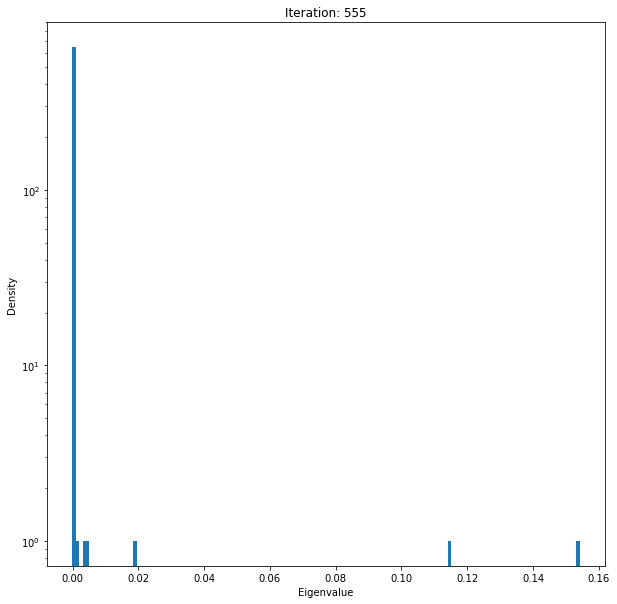

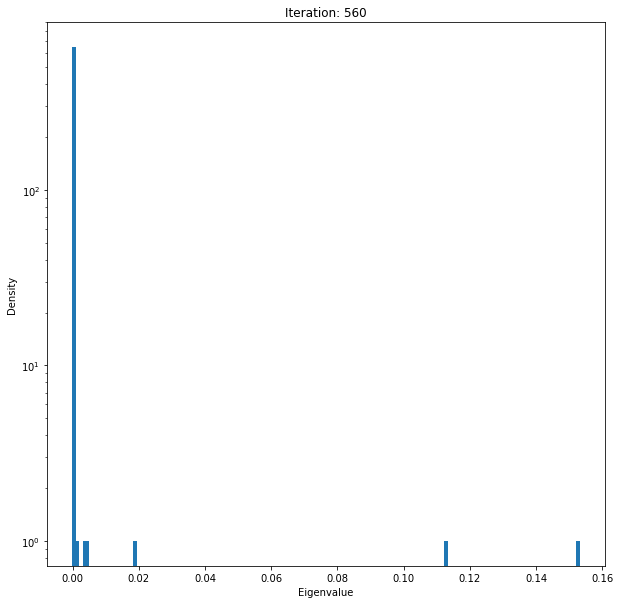

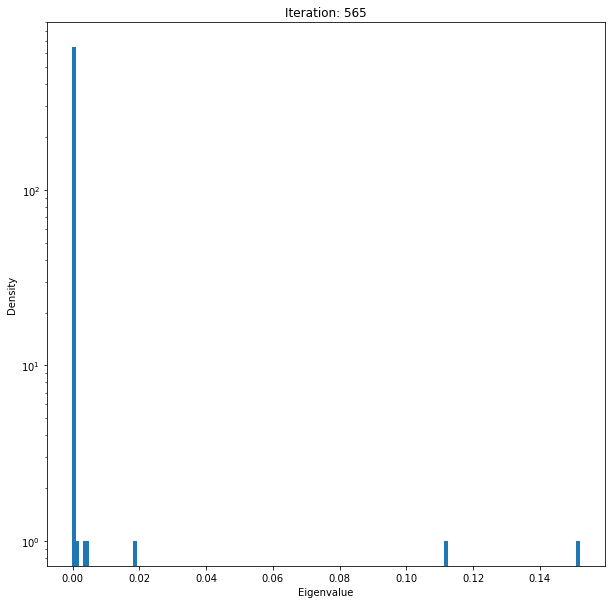

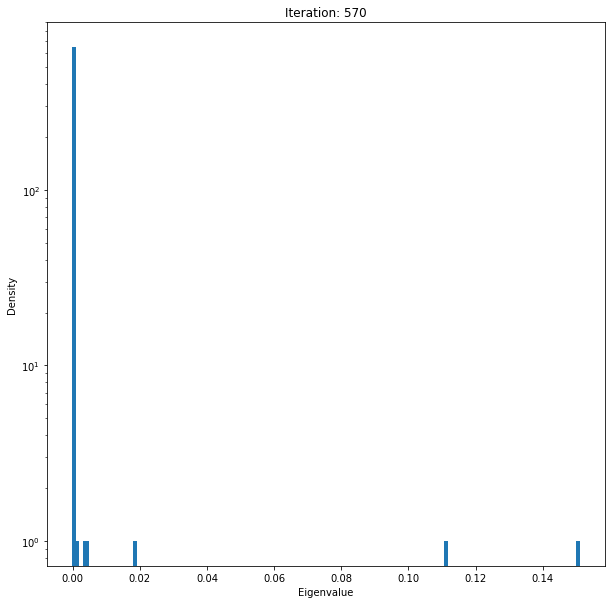

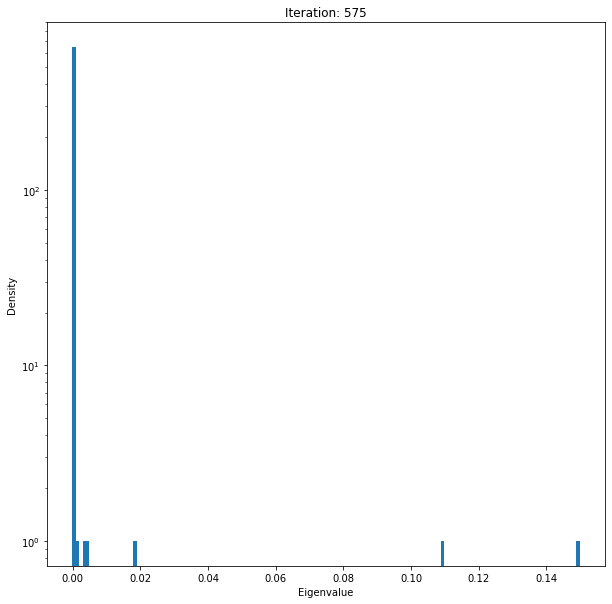

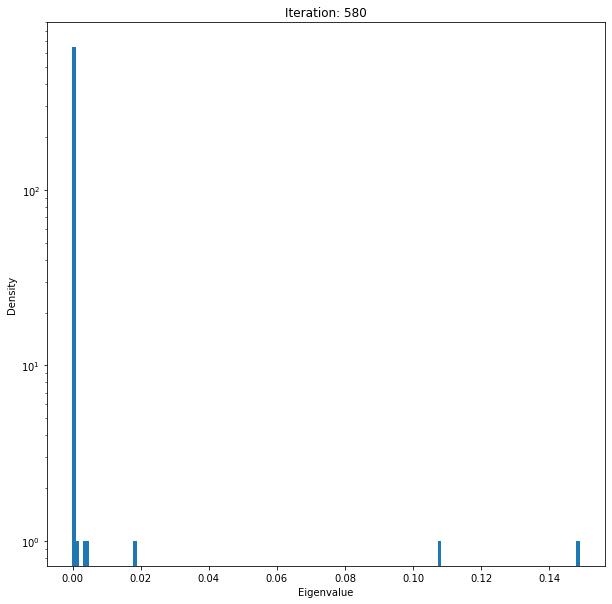

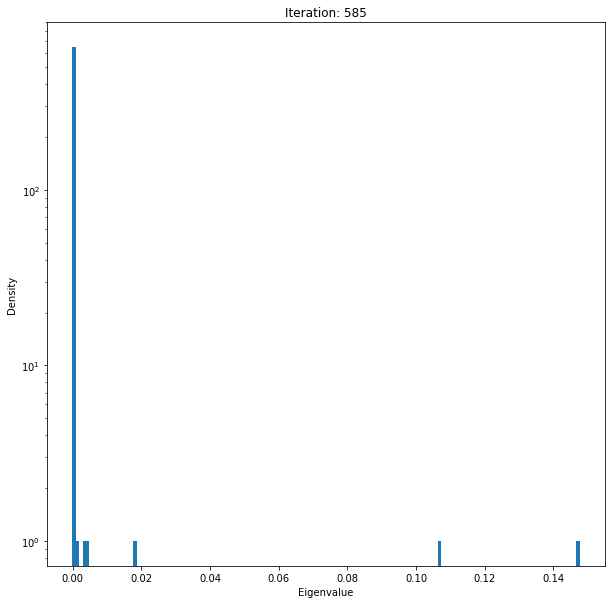

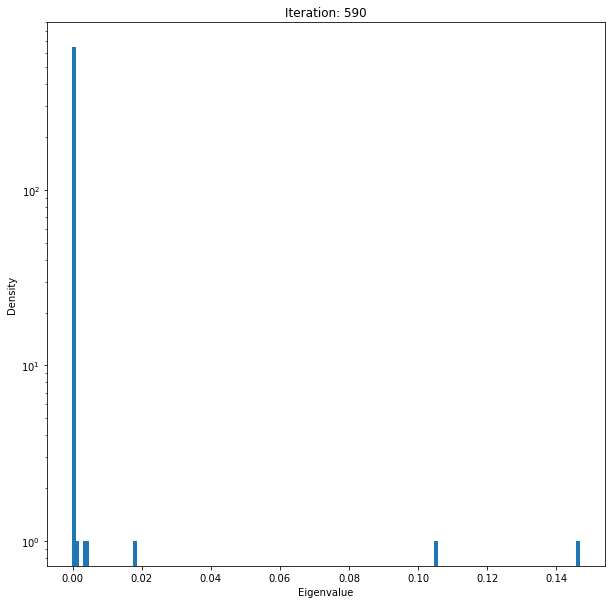

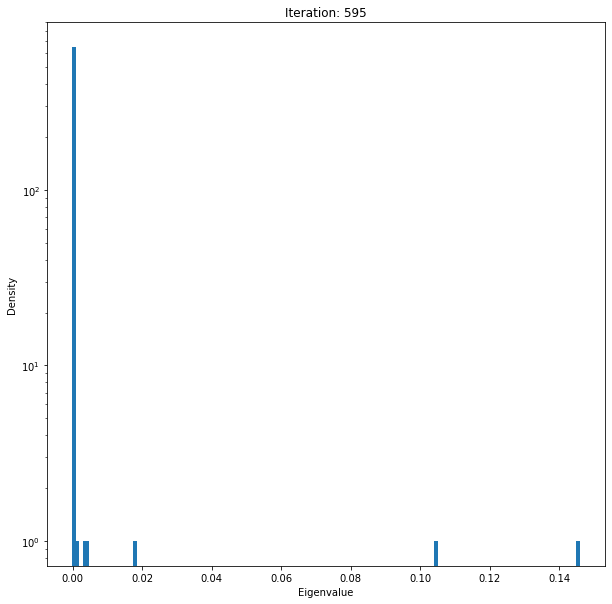

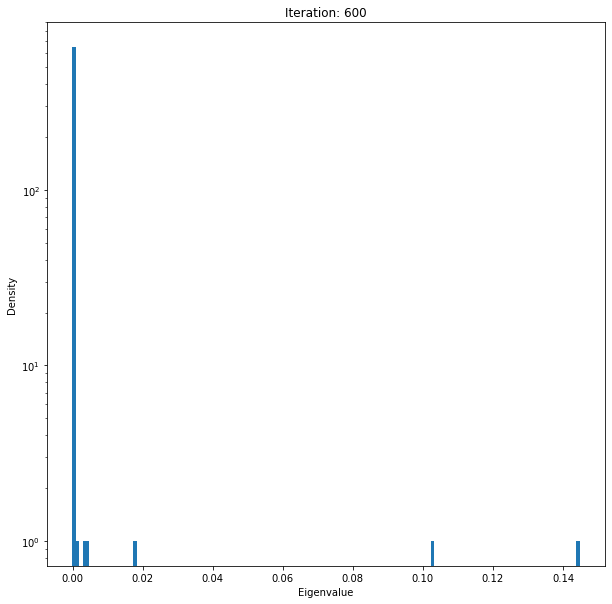

In [22]:
#Produce eigenvalue density plots for all iterations (library approach).
save = True
for item in library_hessian_data:
  itr = item[0]
  library_hessian = item[2]
  e, v = torch.symeig(library_hessian)
  plt.figure(figsize=[10,10])
  plt.hist(e, bins=150)
  plt.xlabel('Eigenvalue')
  plt.ylabel('Density')
  plt.title('Iteration: ' + str(itr))
  plt.yscale('log')
  if save:
   plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/'  + str(data_dimension) + '_dims/' + exp_name 
              + '/' + node_type + '/eigenvalue_density_plots/eigenvalue_density_plot_' + str(itr) + '.pdf')
  plt.show()

In [ ]:
#Eigenvalue histograms comparison.
save = False

plt.figure(figsize=[10,10])
e_l, v_l = torch.symeig(library_hessian)
plt.hist(e_l, bins=150, color='Orange')
plt.title('Comparison of Hessian calculation approaches\nIteration ' + str(itr) + ', Library Approach')
plt.xlabel('Eigenvalue')
plt.ylabel('Density')
plt.yscale('log')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
                + exp_name + '/' + node_type + '/eigenvalue_density_plots_comparisons/' + str(itr) 
                + '_lib_eigenvalue_density.pdf')
plt.show()

try:
  e_ma, v_ma = torch.symeig(manual_hessian)
  plt.figure(figsize=[10,10])
  plt.hist(e_ma, bins=150, color='Green')
  plt.title('Comparison of Hessian calculation approaches\nIteration ' + str(itr) + ', Manual Approach')
  plt.xlabel('Eigenvalue')
  plt.ylabel('Density')
  if save:
    plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
                  + exp_name + '/' + node_type + '/eigenvalue_density_plots_comparisons/' + str(itr) 
                  + '_man_eigenvalue_density.pdf')
  plt.show()

except NameError:
  pass

plt.figure(figsize=[10,10])
e_mo, v_mo = torch.symeig(mofd_hessian)
plt.hist(e_mo, bins=150, color='Blue')
plt.title('Comparison of Hessian calculation approaches\nIteration ' + str(itr) + ', MOFD, h = 1e-7')
plt.xlabel('Eigenvalue')
plt.ylabel('Density')
plt.yscale('log')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
                + exp_name + '/' + node_type + '/eigenvalue_density_plots_comparisons/' + str(itr) 
                + '_mofd_7_eigenvalue_density.pdf')
plt.show()

In [ ]:
#Bulk eigenvalue histograms comparison.
save = False

plt.figure(figsize=[10,10])
e_l, v_l = torch.symeig(library_hessian)
plt.hist(e_l[:-1], bins=150, color='Orange')
plt.title('Comparison of Hessian eigenspectrum bulk\nIteration ' + str(itr) + ', Library Approach')
plt.xlabel('Eigenvalue')
plt.ylabel('Density')
plt.yscale('log')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
                + exp_name + '/' + node_type + '/eigenvalue_density_plots_comparisons/' + str(itr) 
                + '_lib_eigenvalue_density_bulk.pdf')
plt.show()

try:
  e_ma, v_ma = torch.symeig(manual_hessian)
  plt.figure(figsize=[10,10])
  plt.hist(e_ma[:-1], bins=150, color='Green')
  plt.title('Comparison of Hessian eigenspectrum bulk\nIteration ' + str(itr) + ', Manual Approach')
  plt.xlabel('Eigenvalue')
  plt.ylabel('Density')
  if save:
    plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
                  + exp_name + '/' + node_type + '/eigenvalue_density_plots_comparisons/' + str(itr) 
                  + '_man_eigenvalue_density_bulk.pdf')
  plt.show()

except NameError:
  pass

plt.figure(figsize=[10,10])
e_mo, v_mo = torch.symeig(mofd_hessian)
plt.hist(e_mo[:-1], bins=150, color='Blue')
plt.title('Comparison of Hessian eigenspectrum bulk\nIteration ' + str(itr) + ', MOFD, h = 1e-7')
plt.xlabel('Eigenvalue')
plt.ylabel('Density')
plt.yscale('log')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
                + exp_name + '/' + node_type + '/eigenvalue_density_plots_comparisons/' + str(itr) 
                + '_mofd_7_eigenvalue_density_bulk.pdf')
plt.show()

In [23]:
#Comparson of trace and extremal eigenvalues through training.

node_hessian_data = torch.load('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/'
                              + 'nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
                              + exp_name + '/node/hessian_data/library_hessian_data.pt')

anode_hessian_data = torch.load('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/'
                              + 'nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/' 
                              + exp_name + '/anode(1)/hessian_data/library_hessian_data.pt')

iters = []
e_max_node = []
e_second_max_node = []
e_min_node = []
trace_node = []
e_max_anode = []
e_second_max_anode = []
e_min_anode = []
trace_anode = []

trace_ratio_node = []
trace_ratio_anode = []

for item in node_hessian_data:
  node_hessian = item[2]
  e, v = torch.symeig(node_hessian)
  e_max_node.append(e[-1].item())
  e_second_max_node.append(e[-2].item())
  e_min_node.append(e[0].item())
  trace = torch.trace(node_hessian)
  trace_node.append(trace)
  iters.append(item[0])
  if trace.item() != 0:
    trace_ratio = (e[-1].item())/(trace.item())
    trace_ratio_node.append(trace_ratio)
  else:
    trace_ratio_node.append(0)


for item in anode_hessian_data:
  anode_hessian = item[2]
  e, v = torch.symeig(anode_hessian)
  e_max_anode.append(e[-1].item())
  e_second_max_anode.append(e[-2].item())
  e_min_anode.append(e[0].item())
  trace = torch.trace(anode_hessian)
  trace_anode.append(trace)
  if trace.item() != 0:
    trace_ratio = (e[-1].item())/(trace.item())
    trace_ratio_anode.append(trace_ratio)
  else:
    trace_ratio_anode.append(0)

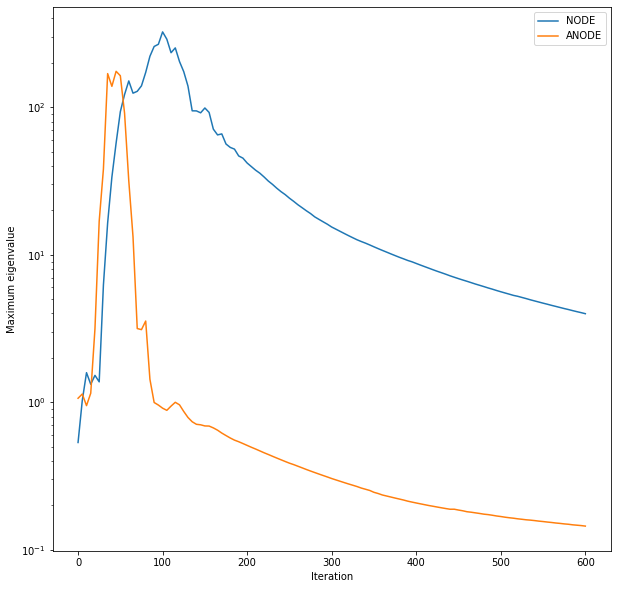

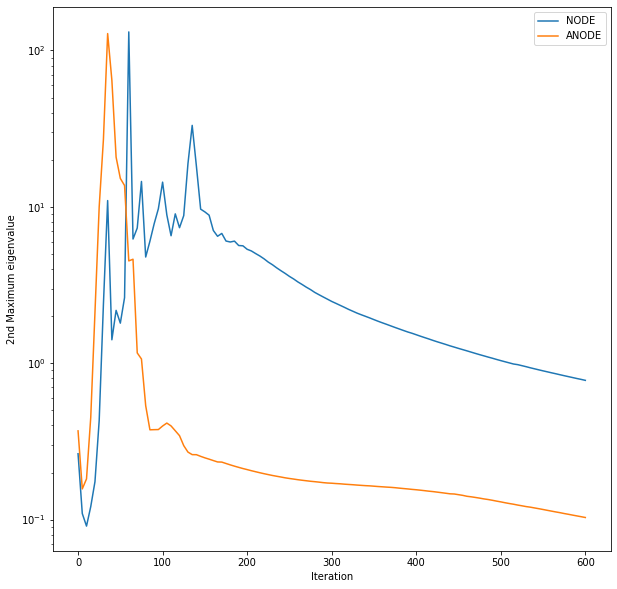

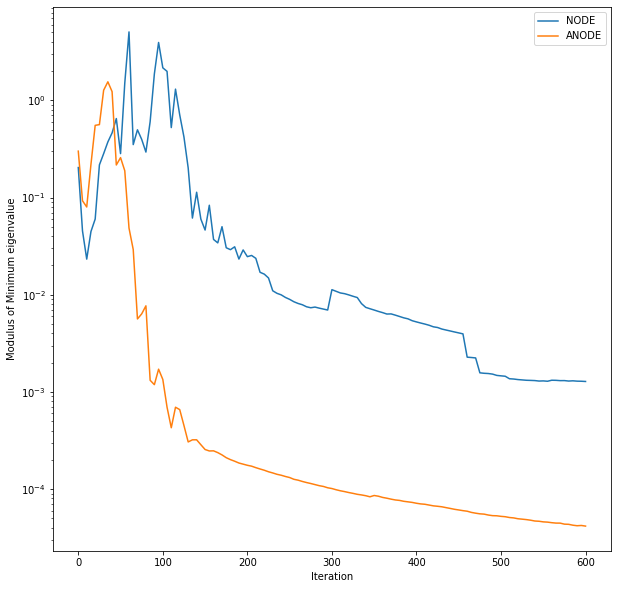

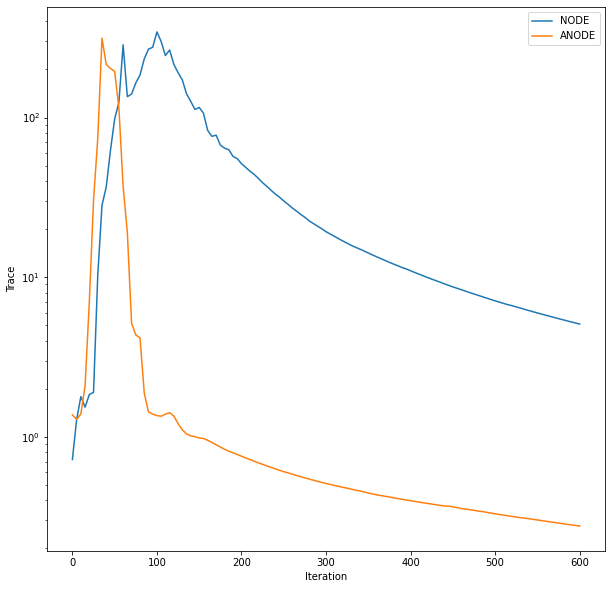

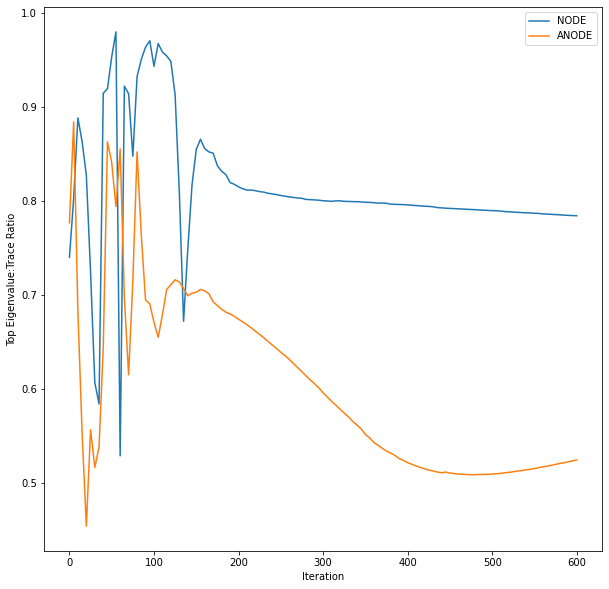

In [25]:
#Plots of trace and extremal eigenvalues through training.
save = True

plt.figure(figsize=[10,10])
plt.plot(iters, e_max_node, label = 'NODE')
plt.plot(iters, e_max_anode, label = 'ANODE')
plt.legend()
plt.ylabel('Maximum eigenvalue')
plt.yscale('log')
plt.xlabel('Iteration')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
              + exp_name + '/augmentation_comparisons/maximum_eigenvalue_curves.pdf')
plt.show()

plt.figure(figsize=[10,10])
plt.plot(iters, e_second_max_node, label = 'NODE')
plt.plot(iters, e_second_max_anode, label = 'ANODE')
plt.legend()
plt.ylabel('2nd Maximum eigenvalue')
plt.yscale('log')
plt.xlabel('Iteration')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
              + exp_name + '/augmentation_comparisons/2nd_maximum_eigenvalue_curves.pdf')
plt.show()

_e_min_node = [-i for i in e_min_node]
_e_min_anode = [-i for i in e_min_anode]
plt.figure(figsize=[10,10])
plt.plot(iters, _e_min_node, label = 'NODE')
plt.plot(iters, _e_min_anode, label = 'ANODE')
plt.legend()
plt.ylabel('Modulus of Minimum eigenvalue')
plt.yscale('log')
plt.xlabel('Iteration')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
              + exp_name + '/augmentation_comparisons/minimum_eigenvalue_curves.pdf')
plt.show()

plt.figure(figsize=[10,10])
plt.plot(iters, trace_node, label = 'NODE')
plt.plot(iters, trace_anode, label = 'ANODE')
plt.legend()
plt.ylabel('Trace')
plt.yscale('log')
plt.xlabel('Iteration')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
              + exp_name + '/augmentation_comparisons/trace_curves.pdf')
plt.show()

plt.figure(figsize=[10,10])
plt.plot(iters, trace_ratio_node, label = 'NODE')
plt.plot(iters, trace_ratio_anode, label = 'ANODE')
plt.legend()
plt.ylabel('Top Eigenvalue:Trace Ratio')
plt.xlabel('Iteration')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/'+ str(data_dimension) + '_dims/'
              + exp_name + '/augmentation_comparisons/trace_ratio_curves.pdf')
plt.show()

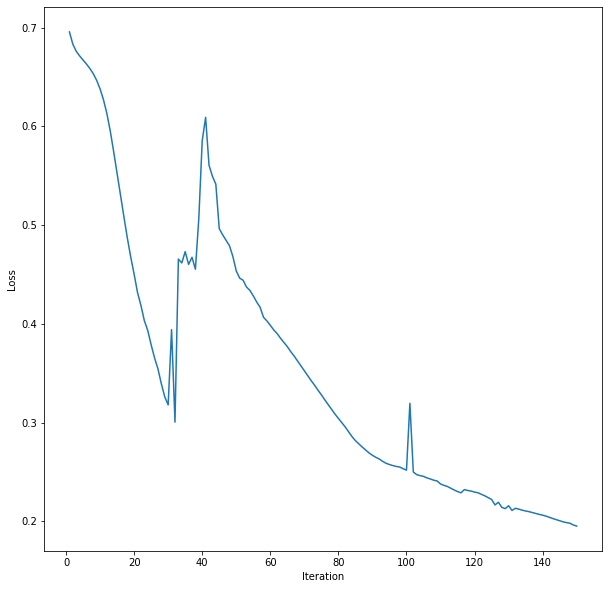

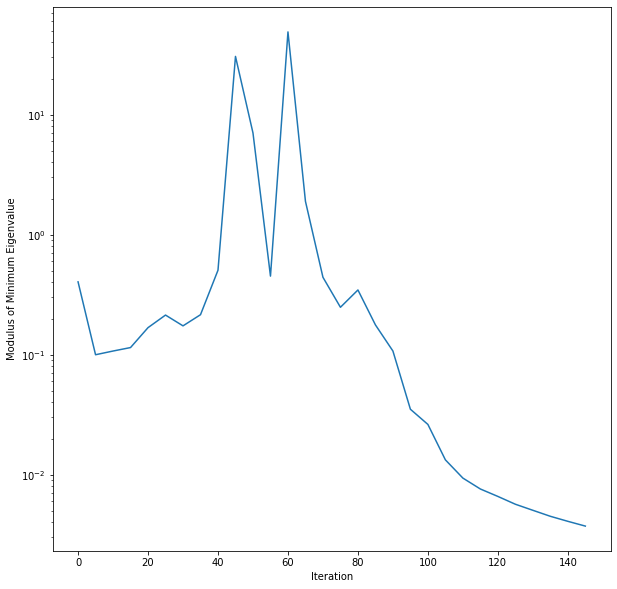

In [ ]:
#Produce loss curves over a smaller range of iterations, to allow detailed examination.
save = False
node_type = 'node'
loss_data = np.load('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
                    + exp_name +'/' + node_type +'/loss_arr.npy')

iters_data = np.load('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
                     + exp_name +'/' + node_type +'/itr_arr.npy')

iter_min = 0
iter_max = 150

#Detailed loss curve.
plt.figure(figsize=[10,10])
plt.plot(iters_data[iter_min:iter_max], loss_data[iter_min:iter_max])
plt.xlabel('Iteration')
plt.ylabel('Loss')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
              + exp_name + '/node/detailed_loss_curve_3.pdf')
plt.show()

iters = np.arange(iter_min, iter_max, 5)

eigenvalues = []
for i in iters:
  for item in library_hessian_data:
    if item[0] == i:
      e, v = torch.symeig(item[2])
      eigenvalues.append(e[0].item())

_eigenvalues = [-i for i in eigenvalues]

#Detailed bottom eigenvalue curve.
plt.figure(figsize=[10,10])
plt.plot(iters, _eigenvalues)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Modulus of Minimum Eigenvalue')
if save:
  plt.savefig('/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/cross_entropy/' + str(data_dimension) + '_dims/'
              + exp_name + '/node/eigenvalue_density_plots/detalied_maximum_eigenvalues_3.pdf')
plt.show()